# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

The **business objective** is to identify the key factors or features that influence the price of used cars. This analysis will help a used car dealership make strategic decisions about which vehicles to purchase and how to price them effectively.

From a **data science perspective**, this is a **supervised regression problem**, where the goal is to model the relationship between the target variable (car price) and several predictor variables (such as regioin, condition, model, mileage (odometer), year, fuel type, and transmission).

The project will follow the **CRISP-DM** framework, starting with **exploratory data analysis (EDA)**  to uncover patterns, trends, and correlations within the data. It will also include **feature engineering** to transform and prepare the data, and model building and evaluation to accurately predict car prices and quantify the impact of different features. The strength of these impacts will help inform the dealership’s pricing strategy.


---

Project Roadmap (CRISP-DM Steps):

**1. Understanding the Dataset**

   Grasp the structure, variables, and potential quality issues within the dataset.

**2. Initial Data Cleaning**

Address missing values, duplicates, and incorrect data types; prepare the data for analysis.

**3. EDA – Univariate Analysis**

Explore the distribution of individual variables to identify trends, outliers, and data quality issues.

**4. EDA – Bivariate and Multivariate Analysis**

Investigate relationships between predictors and the target variable, as well as between predictors.

**5. Feature Engineering Ideas**

Create or transform variables to better capture patterns and improve model performance (e.g., age from year, log-transform of mileage).

**6. Behavioral Insights & Hypotheses**

Formulate hypotheses based on data patterns — e.g., "Newer cars with automatic transmission and low mileage have higher resale value."

**7. Model Building**

Train multiple regression models (e.g., linear regression) to predict car prices.

**8. Model Evaluation**

Assess model accuracy using appropriate metrics (e.g., RMSE, MAE) and validate generalization with train-test splits or cross-validation.

**9. Data Visualization for Storytelling**

Develop intuitive charts and dashboards to communicate findings and support data-driven decision-making for the dealership.





## Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### **Understanding the Dataset**

In [3]:
# read data from data\vehicles
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
os.makedirs("images", exist_ok=True)

# Assuming the data file is named 'vehicles.csv' and located in a directory named 'data'
try:
    df = pd.read_csv('sample_data/vehicles.csv')
    print("Successfully read data from data/vehicles.csv")
    print("First 5 rows of the DataFrame:")
    print(df.head(10))
except FileNotFoundError:
    print("Error: data/vehicles.csv not found. Make sure the file path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

# data exploration
print("\nDataFrame Info:")
df.info()
print("\nDataFrame shape:")
print(df.shape)
print("\nDataFrame Description:")
df.describe()

# Check data types of each column
print(df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Successfully read data from data/vehicles.csv
First 5 rows of the DataFrame:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   
5  7222379453           hudson valley   1600   NaN          NaN   NaN   
6  7221952215           hudson valley   1000   NaN          NaN   NaN   
7  7220195662           hudson valley  15995   NaN          NaN   NaN   
8  7209064557         medford-ashland   5000   NaN          NaN   NaN   
9  7219485069                    erie   3000   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN      

In [4]:
# Calculate missing values and their percentage
def missing_data_summary(df, sort = True, round_decimals = 2):
    missing_df = pd.DataFrame({
        'Missing Count': df.isnull().sum(),
        'Missing %': (df.isnull().sum() / len(df) * 100).round(2)
    })

    # show only columns with missing values
    missing_df = missing_df[missing_df['Missing Count'] > 0]

    if sort:
        missing = missing_df.sort_values(by='Missing %', ascending=False)

    return missing

missing_df = missing_data_summary(df)
missing_df

,Missing Count,Missing %
size,306361,71.77
cylinders,177678,41.62
condition,174104,40.79
VIN,161042,37.73
drive,130567,30.59
paint_color,130203,30.50
type,92858,21.75
manufacturer,17646,4.13
title_status,8242,1.93
model,5277,1.24


In [5]:
# explore data uniqe values
print(df.select_dtypes('object').agg('nunique'))

region             404
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64


In [6]:
def plot_normalized_bar(df, col, top_n=None, figsize=(10, 5), palette="crest"):
    """
    Creates a bar plot of the normalized value counts using Seaborn.

    Args:
        df (DataFrame): Your dataset.
        col (str): Column to visualize.
        top_n (int, optional): Show only the top N categories.
        figsize (tuple, optional): Size of the figure.
        palette (str, optional): Seaborn color palette.
    """
    # Calculate proportions
    proportions = df[col].value_counts(normalize=True, dropna=False).round(4).sort_values(ascending=False)
    # Replace NaN index labels with a string for display
    proportions.index = proportions.index.fillna('Unknown')
    if top_n:
        proportions = proportions.head(top_n)

    plt.figure(figsize=figsize)
    sns.barplot(x=proportions.index, y=proportions.values, hue=proportions.index ,legend=False)

    plt.title(f"Normalized Value Counts for '{col}'", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend
    plt.show()


Unique values in 'region':
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulde

/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


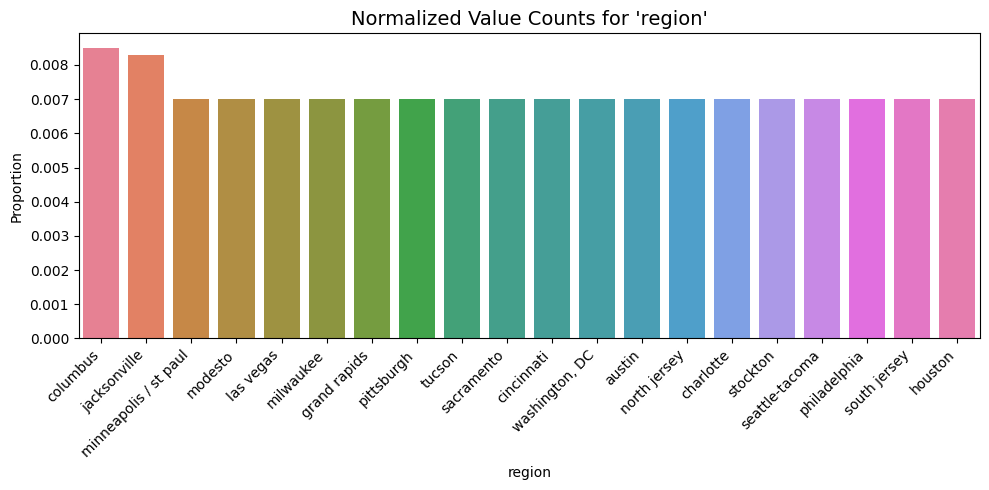


Unique values in 'manufacturer':
[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']
manufacturer
land rover         0.0000
morgan             0.0000
aston-martin       0.0001
datsun             0.0001
ferrari            0.0002
harley-davidson    0.0004
fiat               0.0019
tesla              0.0020
alfa-romeo         0.0021
saturn             0.0026
mercury            0.0028
porsche            0.0032
jaguar             0.0046
rover              0.0049
pontiac            0.0054
mini               0.0056
mitsubishi         0.0077
volvo              0.0079
lincoln            0.0099
infiniti           0.0112
mazda              0.0

/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


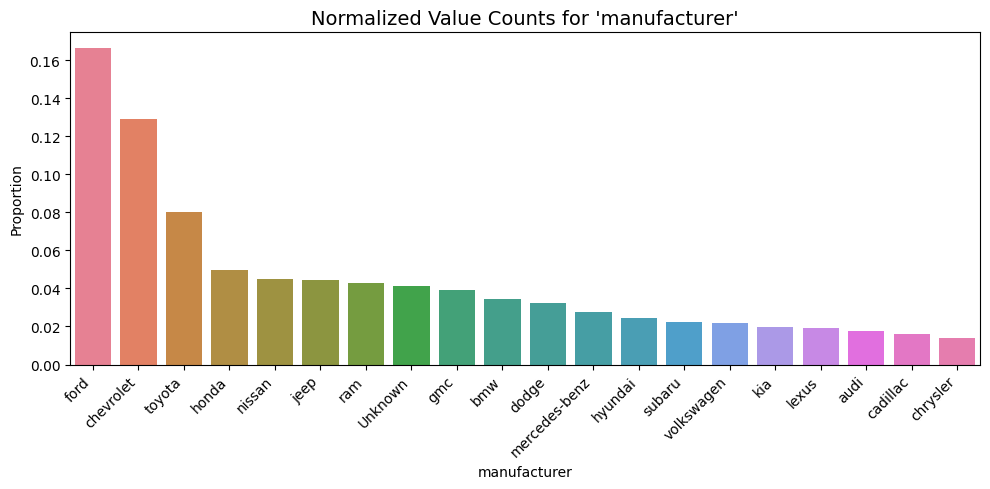


Unique values in 'model':
[nan 'sierra 1500 crew cab slt' 'silverado 1500' ... 'gand wagoneer'
 '96 Suburban' 'Paige Glenbrook Touring']
model
international pro star        0.0000
civic ex turbo                0.0000
1974 Triumph Spitfire 1500    0.0000
ls 460 base 4dr sedan         0.0000
quest 3.5 le                  0.0000
                               ...  
camry                         0.0073
1500                          0.0099
silverado 1500                0.0120
NaN                           0.0124
f-150                         0.0188
Name: proportion, Length: 29650, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


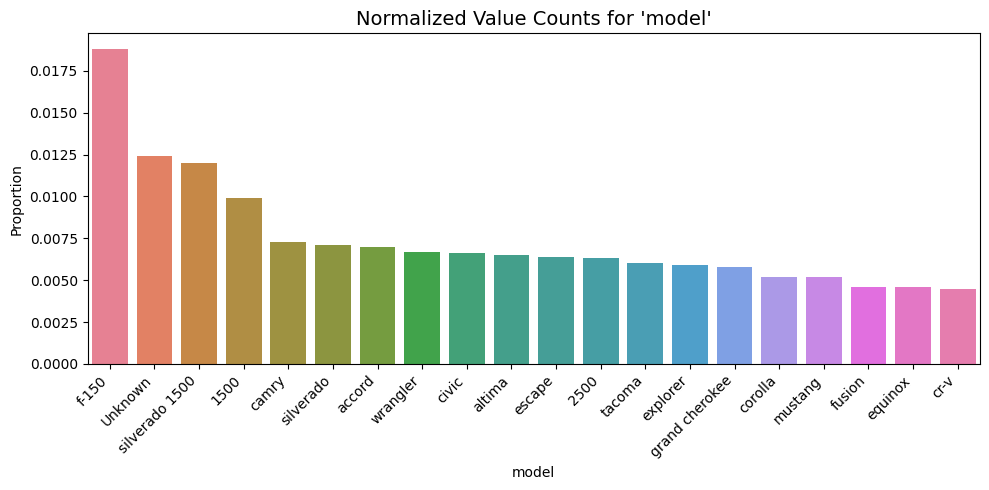


Unique values in 'condition':
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
condition
salvage      0.0014
new          0.0031
fair         0.0159
like new     0.0496
excellent    0.2377
good         0.2845
NaN          0.4079
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


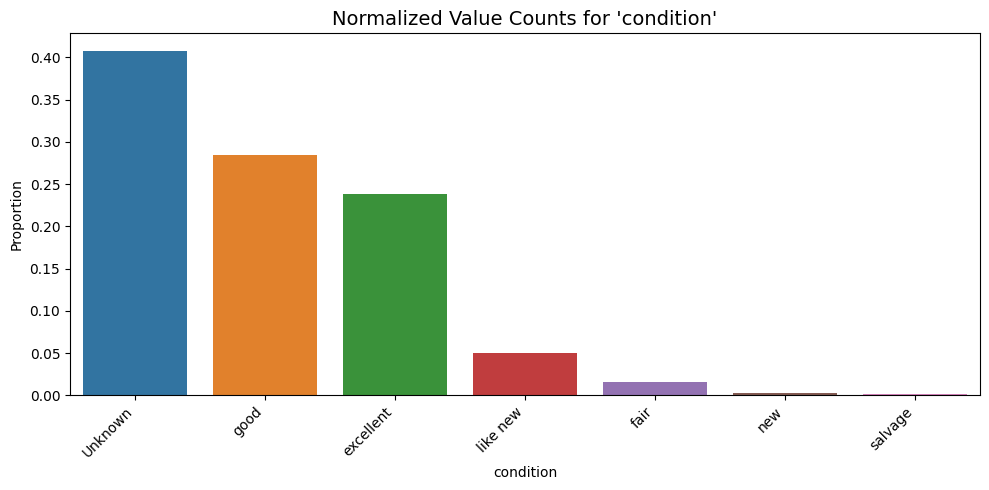


Unique values in 'cylinders':
[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
cylinders
12 cylinders    0.0005
3 cylinders     0.0015
other           0.0030
10 cylinders    0.0034
5 cylinders     0.0040
8 cylinders     0.1688
4 cylinders     0.1819
6 cylinders     0.2206
NaN             0.4162
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


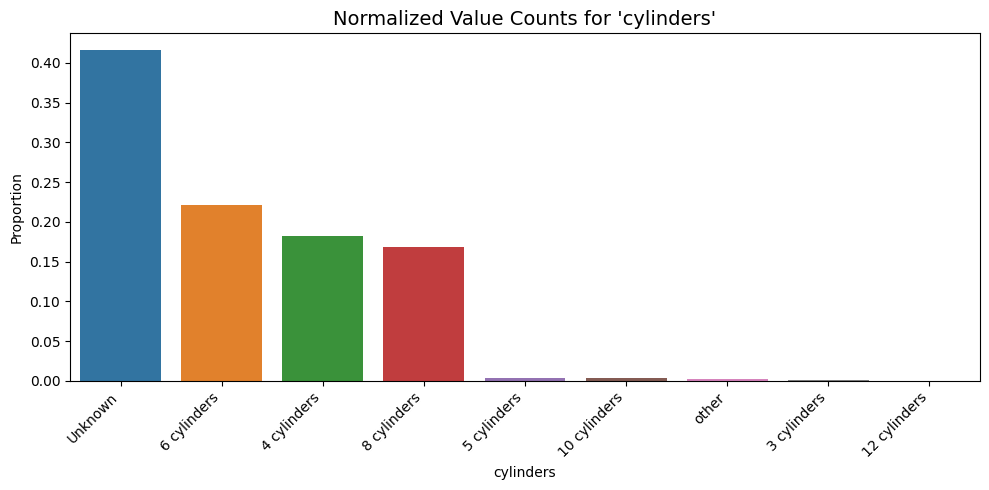


Unique values in 'fuel':
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
fuel
electric    0.0040
NaN         0.0071
hybrid      0.0121
diesel      0.0704
other       0.0720
gas         0.8344
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


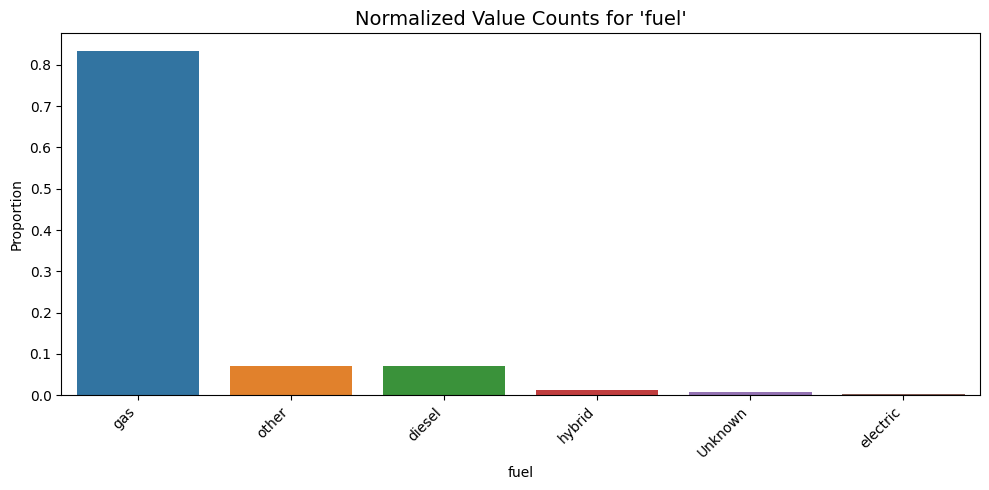


Unique values in 'title_status':
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
title_status
parts only    0.0005
missing       0.0019
lien          0.0033
salvage       0.0091
rebuilt       0.0169
NaN           0.0193
clean         0.9490
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


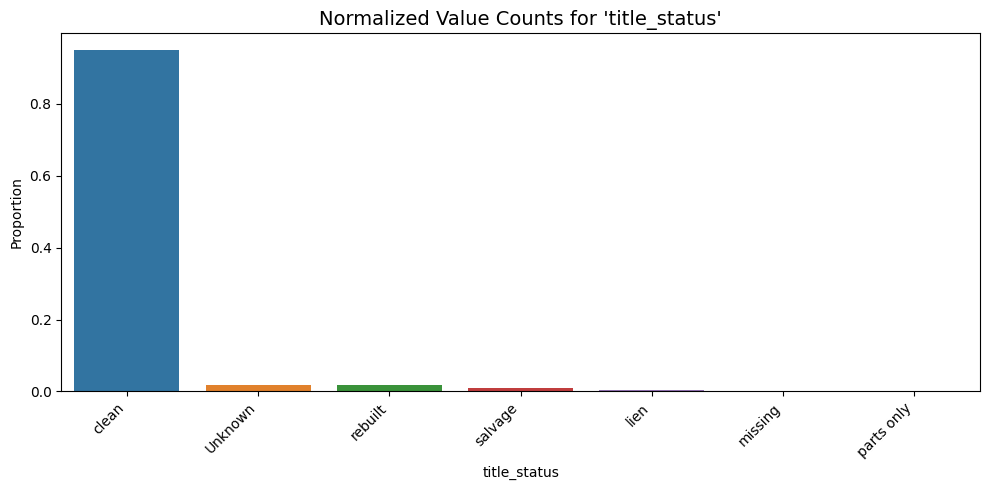


Unique values in 'transmission':
[nan 'other' 'automatic' 'manual']
transmission
NaN          0.0060
manual       0.0588
other        0.1468
automatic    0.7883
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


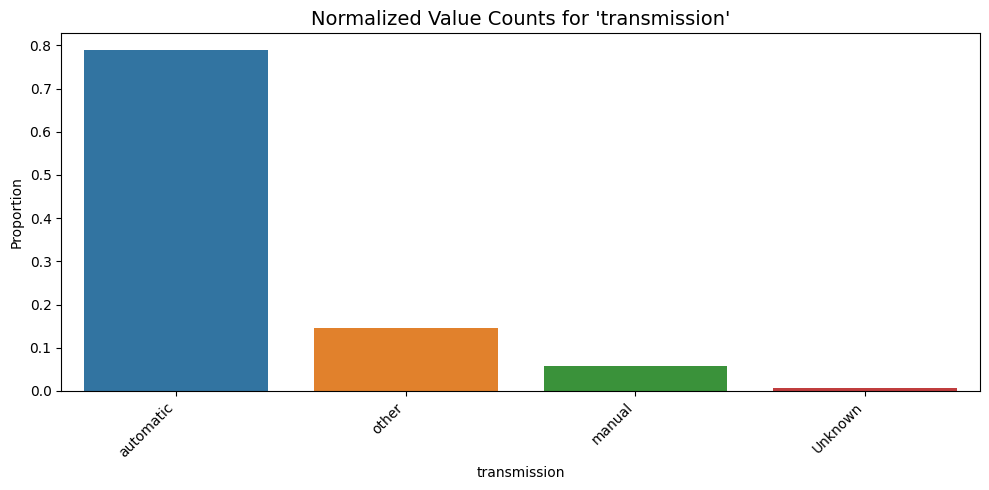


Unique values in 'VIN':
[nan '3GTP1VEC4EG551563' '1GCSCSE06AZ123805' ... '2HGES15535H620534'
 '1FDWF37P64EA24868' 'SAJGX2749VCOO8376']
VIN
1GKET63M872108643    0.0000
WVWAK73C88E246919    0.0000
1C3BT56K3HC293316    0.0000
1GCZGFBA9A1114831    0.0000
4S3BL626297217249    0.0000
                      ...  
5TFTX4CN3EX042751    0.0005
1FTER1EH1LLA36301    0.0005
3C6JR6DT3KG560649    0.0006
1FMJU1JT1HEA52352    0.0006
NaN                  0.3773
Name: proportion, Length: 118247, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


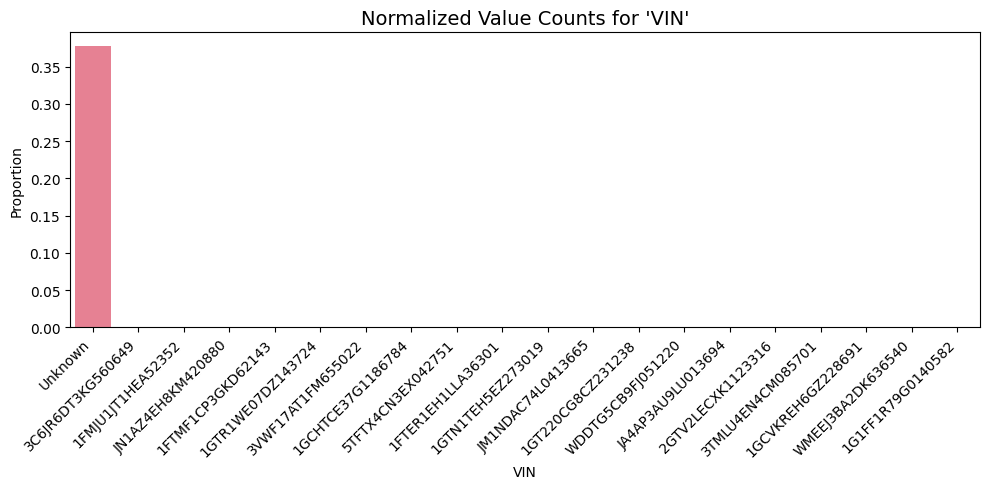


Unique values in 'drive':
[nan 'rwd' '4wd' 'fwd']
drive
rwd    0.1380
fwd    0.2472
NaN    0.3059
4wd    0.3090
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


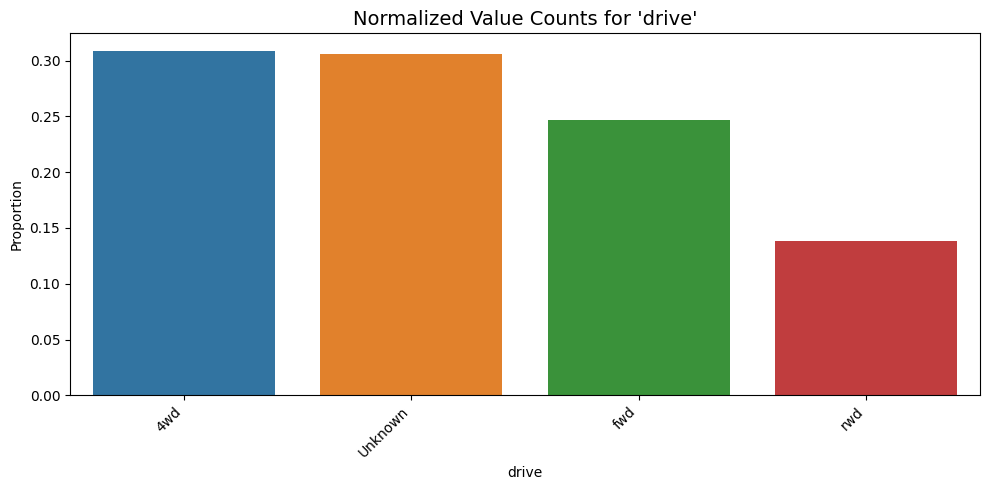


Unique values in 'size':
[nan 'full-size' 'mid-size' 'compact' 'sub-compact']
size
sub-compact    0.0075
compact        0.0454
mid-size       0.0808
full-size      0.1487
NaN            0.7177
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


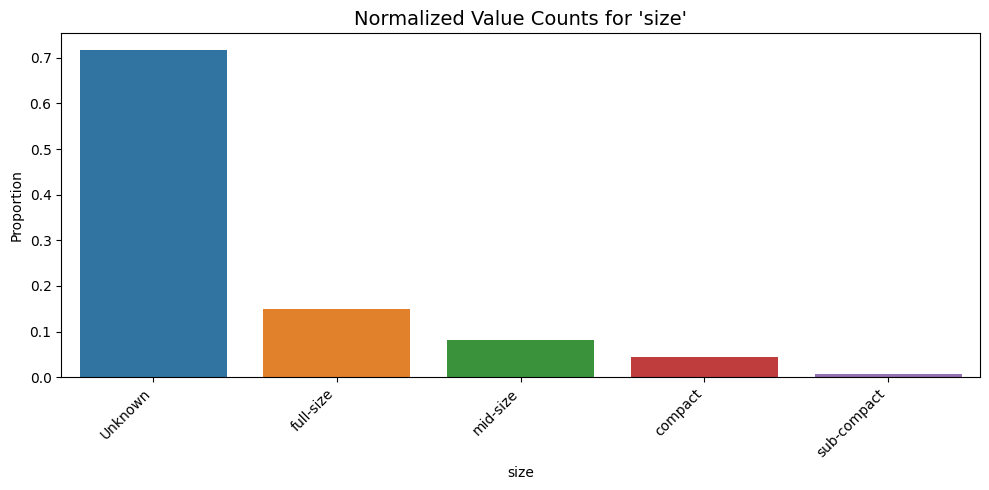


Unique values in 'type':
[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
type
bus            0.0012
offroad        0.0014
mini-van       0.0113
convertible    0.0181
van            0.0200
wagon          0.0252
hatchback      0.0389
coupe          0.0450
other          0.0518
truck          0.0826
pickup         0.1019
SUV            0.1810
sedan          0.2039
NaN            0.2175
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


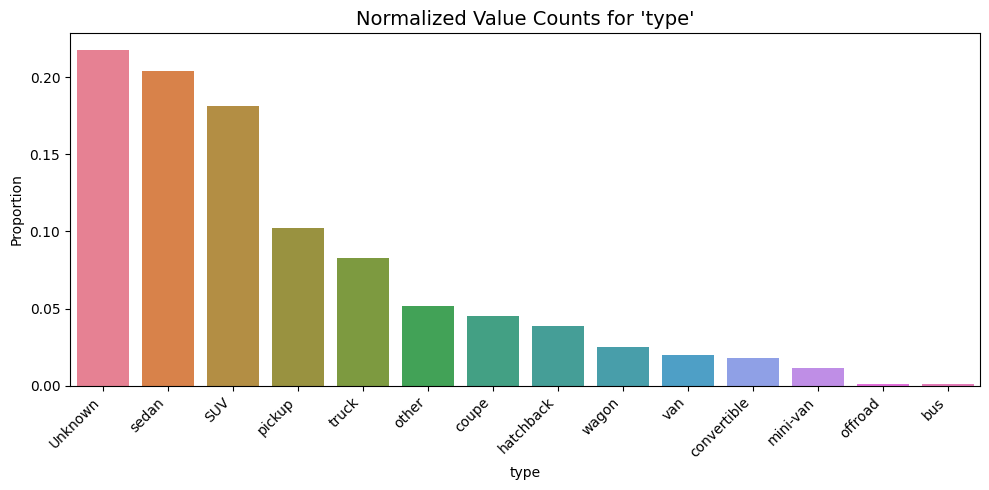


Unique values in 'paint_color':
[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']
paint_color
purple    0.0016
orange    0.0046
yellow    0.0050
brown     0.0154
custom    0.0157
green     0.0172
grey      0.0572
red       0.0714
blue      0.0731
silver    0.1007
black     0.1473
white     0.1857
NaN       0.3050
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


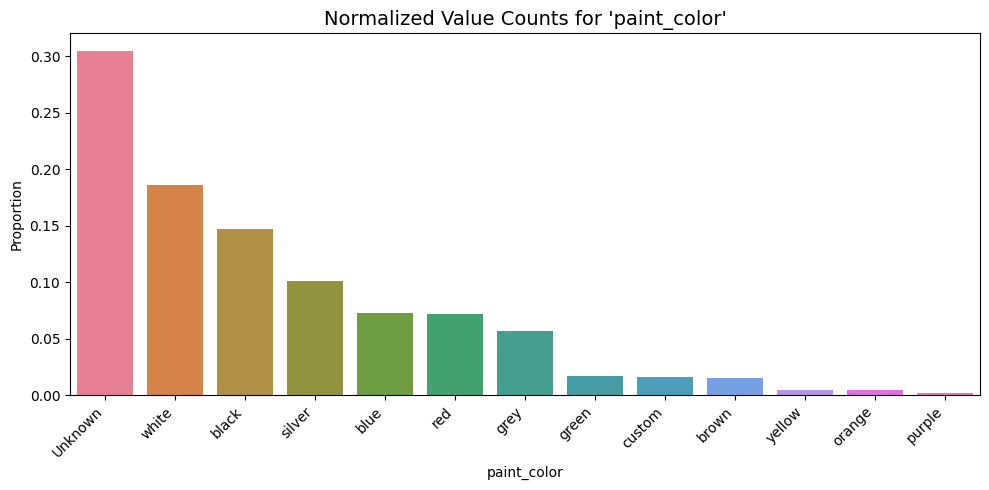


Unique values in 'state':
['az' 'ar' 'fl' 'ma' 'nc' 'ny' 'or' 'pa' 'tx' 'wa' 'wi' 'al' 'ak' 'ca'
 'co' 'ct' 'dc' 'de' 'ga' 'hi' 'id' 'il' 'in' 'ia' 'ks' 'ky' 'la' 'me'
 'md' 'mi' 'mn' 'ms' 'mo' 'mt' 'ne' 'nv' 'nj' 'nm' 'nh' 'nd' 'oh' 'ok'
 'ri' 'sc' 'sd' 'tn' 'ut' 'vt' 'va' 'wv' 'wy']
state
nd    0.0010
wy    0.0014
de    0.0022
ms    0.0024
ne    0.0024
wv    0.0025
ut    0.0027
sd    0.0031
ri    0.0054
vt    0.0059
me    0.0069
hi    0.0069
nh    0.0070
dc    0.0070
la    0.0075
nv    0.0075
ak    0.0081
ar    0.0095
ky    0.0097
mo    0.0101
nm    0.0104
md    0.0112
al    0.0116
ct    0.0122
in    0.0134
ks    0.0145
mt    0.0147
sc    0.0148
ok    0.0159
ga    0.0164
mn    0.0181
ma    0.0191
ia    0.0202
az    0.0203
id    0.0210
nj    0.0228
il    0.0243
va    0.0251
tn    0.0259
co    0.0260
wi    0.0267
pa    0.0322
wa    0.0325
nc    0.0358
mi    0.0396
or    0.0401
oh    0.0415
ny    0.0454
tx    0.0538
fl    0.0668
ca    0.1186
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


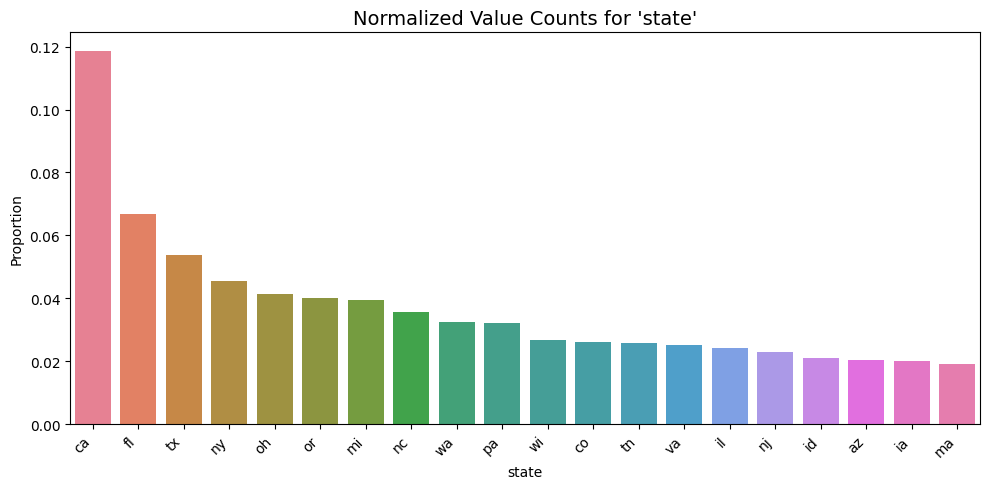

In [7]:
for col in df.select_dtypes(include=['object']):
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())
    df_view = df[col].value_counts(dropna=False,normalize=True).round(4).sort_values()
    print(df_view)
    plot_normalized_bar(df, col=col, top_n=20)

## **Data Preparation**

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

### **Initial Data Cleaning**

In [8]:
# Drop Duplicate
df = df.drop_duplicates()

In [9]:
# Sort by highest percentage of missing values
missing_df = missing_data_summary(df)
missing_df

,Missing Count,Missing %
size,306361,71.77
cylinders,177678,41.62
condition,174104,40.79
VIN,161042,37.73
drive,130567,30.59
paint_color,130203,30.50
type,92858,21.75
manufacturer,17646,4.13
title_status,8242,1.93
model,5277,1.24


In [10]:
# Drop VIN  not analytically useful for modeling.
# Drop Size too much missing data about 70%
df = df.drop(columns=["VIN", "size"])

In [11]:
# Define the critical columns
critical_cols = ['model', 'manufacturer', 'odometer', 'year']

# Drop rows where ALL critical columns are missing
df = df.dropna(subset=critical_cols, how='all')
# Sort by highest percentage of missing values
missing_df = missing_data_summary(df)
missing_df

,Missing Count,Missing %
cylinders,177610,41.61
condition,174036,40.78
drive,130499,30.58
paint_color,130135,30.49
type,92790,21.74
manufacturer,17578,4.12
title_status,8174,1.92
model,5209,1.22
odometer,4332,1.01
fuel,2945,0.69


In [12]:
#Categorical Imputation:

#Use new category "unknown" for columns [condition, drive, type, and paint_color] to preserve data volume.
unknown_fill_cols = ['condition', 'drive', 'type', 'paint_color','cylinders']
df[unknown_fill_cols] = df[unknown_fill_cols].fillna('unknown')
#Use mode imputation for fuel, title_status, transmission.
mode_fill_cols = ['fuel', 'title_status', 'transmission']
for col in mode_fill_cols:
    df.fillna({col: df[col].mode()[0]}, inplace=True)

In [13]:
# Fill Model with Mode based on Manufacturer and Cylinder if not just Manufacturer
mode_by_manufacturer_cylinders = (
        df.groupby(['manufacturer','cylinders'])['model']
        .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    )
#most_common_model_by_manufacturer

def fill_model(row):
      if pd.isna(row['model']):
          # Try to fill with (manufacturer, cylinders)
          model = mode_by_manufacturer_cylinders.get((row['manufacturer'], row['cylinders']))
          if pd.notna(model):
              return model
          # Fallback: use just manufacturer
          fallback = mode_by_manufacturer_cylinders.get((row['manufacturer'], mode_by_manufacturer_cylinders.index.get_level_values(1).min()))
          if pd.notna(fallback):
              return fallback
          return 'unknown'
      return row['model']

df['model'] = df.apply(fill_model, axis=1)
# Sort by highest percentage of missing values
missing_df = missing_data_summary(df)
missing_df

,Missing Count,Missing %
manufacturer,17578,4.12
odometer,4332,1.01
year,1137,0.27


In [14]:
# Sort by highest percentage of missing values
missing_df = missing_data_summary(df)
missing_df

,Missing Count,Missing %
manufacturer,17578,4.12
odometer,4332,1.01
year,1137,0.27


In [15]:
# Random Data Cleaning
df.loc[
    df['model'] == "$362.47, $1000 down, oac, 2.9%apr $362.47,luxury low miles $1000 down, only 40k miles",
    'model'
] = np.nan


#junk_models = ['name', '♿', 'vmi', 't', '', '...']
#df.query("model in @junk_models")
df['model'] = df['model'].str.replace(r'♿', 'vmi')
df[df['model'].str.contains(r'vmi', na=False)]['model'].unique()
df.loc[df['model'].str.contains(r'vmi', na=False), 'model'] = 'vmi'
df.loc[df['model'].str.contains(r'1500 trx', na=False), 'model'] ='1500 trx'

In [16]:
df['model'].value_counts(dropna=False,normalize=True).round(4).sort_values()
model_freq = df['model'].value_counts(normalize=True)

# Get models to keep (more than 0.0001 = 0.01%)
models_to_keep = model_freq[model_freq > 0.0001].index

# Filter the DataFrame
df = df[df['model'].isin(models_to_keep)]

In [17]:
df['model'].value_counts(dropna=False,normalize=True).round(4).sort_values()

,proportion
model,
s60 t5 inscription,0.0001
is 350 f sport sedan 4d,0.0001
e350 box truck,0.0001
sonata sport sedan 4d,0.0001
f250 platinum 4x4,0.0001
...,...
camry,0.0104
silverado,0.0108
1500,0.0162


In [18]:
import re
def extract_generic_model(model):
    if pd.isna(model):
        return None
    model = str(model).lower().strip()

    tokens = re.split(r'\s+', model)

    ignore = {
        'series', 'class', 'sedan', 'coupe', 'utility', 'convertible',
        'sport', 'van', 'wagon', 'truck', '2d', '4d', 'awd', 'fwd', 'rwd'
    }

    for tok in tokens:
        if tok not in ignore and not re.fullmatch(r'\d+d?', tok):
            return tok
    return tokens[0] if tokens else model

df['model_generic'] = df['model'].apply(extract_generic_model)
df['model_generic'].value_counts(dropna=False,normalize=True).round(4).sort_values()
df['model'] = df['model_generic']
df = df.drop(columns=['model_generic'])

In [19]:
# Extact Base model to simplify Model
# import re
def extract_base_model(model):
    if pd.isna(model):
        return model
    model = model.lower().strip()

    # pick the last model-like token from string
    match = re.findall(r'\b([a-z]?\d{1,3}i|x\d|z\d|m\d|i\d|z4|z3|m3|m5)\b', model)
    if match:
        return match[-1]  # return the most specific match
    # fallback: take the first word as base
    return model.split()[0]

# Apply to create a new column
df['model_base'] = df['model'].apply(extract_base_model)

df.drop(columns=['model'], inplace=True)
df.rename(columns={'model_base': 'model'}, inplace=True)

In [20]:
# Only fill missing manufacturer from mapping we create
# df.loc[df['manufacturer'].isna(), 'manufacturer'] = (
#     df.loc[df['manufacturer'].isna(), 'model'].map(model_manufacturer_map)
# )

In [21]:
missing_df = missing_data_summary(df)
missing_df

,Missing Count,Missing %
manufacturer,4769,1.51
odometer,3441,1.09
year,276,0.09


In [22]:
#Use median for odometer.
mode_odometer_map = (
    df.dropna(subset=['odometer', 'year', 'manufacturer', 'model'])
      .groupby(['manufacturer', 'model', 'year'])['odometer']
      .median())

def fill_odometer(row):
    if pd.notna(row['odometer']):
        return row['odometer']

    key = (row['manufacturer'], row['model'], row['year'])
    return mode_odometer_map.get(key, np.nan)  # fallback remains NaN if no match

# Apply the function row-wise
df['odometer'] = df.apply(fill_odometer, axis=1)

In [23]:
missing_df = missing_data_summary(df)
missing_df

,Missing Count,Missing %
manufacturer,4769,1.51
year,276,0.09
odometer,185,0.06


In [24]:
df.dropna(subset=['manufacturer', 'model', 'year'], inplace=True)

 Find Wrong Data

In [25]:
pd.options.display.float_format = '{:,.2f}'.format
df["price"].describe([0.0,0.05,0.1, 0.80,0.85,0.90,0.95,0.99]).round(2)
price_cap_max = df['price'].quantile(0.99)
price_cap_min = df['price'].quantile(0.10)
print(price_cap_max)
print(price_cap_min)




59999.0
420.6000000000058


In [26]:
df["year"].describe([0.0,0.05,0.1, 0.80,0.85,0.90,0.95,0.99]).round(2)
vehicle_age_cap_max = df['year'].quantile(0.99)
vehicle_age_cap_min = df['year'].quantile(0.05)
print(vehicle_age_cap_max)
print(vehicle_age_cap_min)

2020.0
2001.0


In [27]:
df["odometer"].describe([0.0,0.05,0.1, 0.80,0.85,0.90,0.95,0.99]).round(2)
odometer_cap_max = df['odometer'].quantile(0.95)
odometer_cap_min = df['odometer'].quantile(0.05)
print(odometer_cap_max)
print(odometer_cap_min)

202000.0
7618.0


In [28]:
# to remove extreme outliers using 10% and 95% quantile
df = df[
    ((df['price'] >= price_cap_min) & (df['price'] <= price_cap_max)) &
    ((df['year'] >= vehicle_age_cap_min) & (df['year'] <= vehicle_age_cap_max)) &
     ((df['odometer'] >= odometer_cap_min) & (df['odometer'] <= odometer_cap_max))
]


In [29]:
#Condition affects price, but the relationship is not perfectly linear—some “good” cars are priced higher than “excellent” or “new” ones.
#"Good" condition cars surprisingly have the highest median price and a wide upper range.
# Unknown is noisy and price are outliers decided to replace with mode
most_common = df[df['condition'] != 'unknown']['condition'].mode()[0]
df['condition'] = df['condition'].replace('unknown', most_common)


# Unknown is noisy and price are outliers decided to replace with mode
most_common = df[df['type'] != 'unknown']['type'].mode()[0]
df['type'] = df['type'].replace('unknown', most_common)

# Unknown is noisy and price are outliers decided to replace with mode
most_common = df[df['cylinders'] != 'unknown']['cylinders'].mode()[0]
df['cylinders'] = df['cylinders'].replace('unknown', most_common)

# Unknown is noisy and price are outliers decided to replace with mode
most_common = df[df['drive'] != 'unknown']['drive'].mode()[0]
df['drive'] = df['drive'].replace('unknown', most_common)

### **Univariate Analysis: Numerical Features**

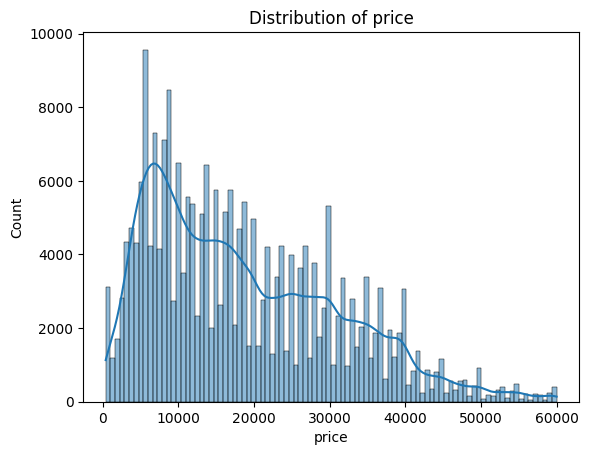

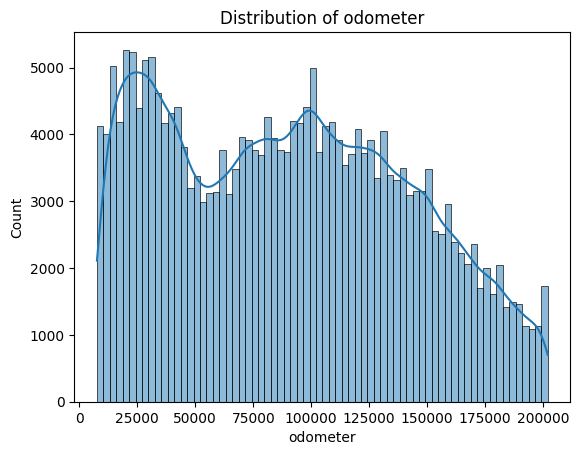

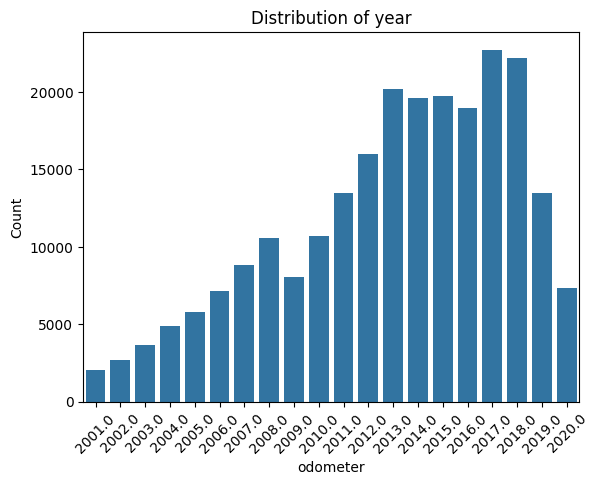

In [30]:
df[['price', 'odometer', 'year']].describe().T.round(2)

for col in ['price', 'odometer']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

sns.countplot(data=df, x='year', order=sorted(df['year'].dropna().unique()))
plt.title(f'Distribution of year')
plt.xticks(rotation=45)
plt.xlabel(col)
plt.ylabel('Count')
plt.show()

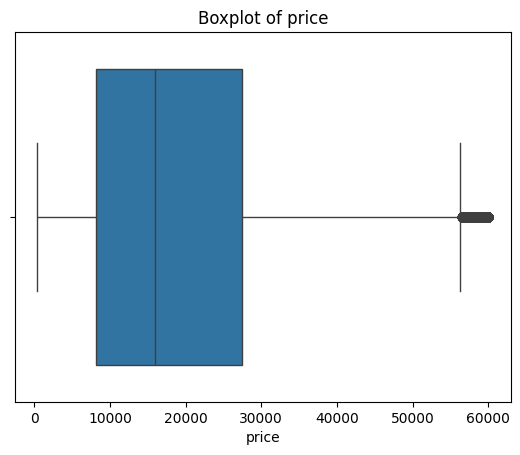

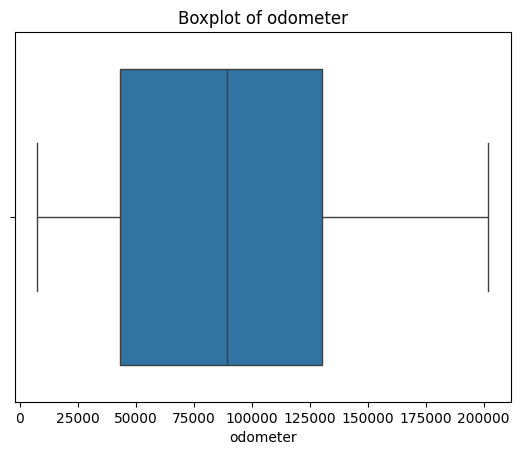

In [31]:
for col in ['price', 'odometer']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Unique values in 'region':
['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' 'mohave county' 'phoenix'
 'prescott' 'show low' 'sierra vista' 'tucson' 'yuma' 'fayetteville'
 'fort smith' 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera' 'gold country' 'hanford-corcoran' 'humboldt county'
 'imperial county' 'inland empire' 'los angeles' 'mendocino county'
 'merced' 'modesto' 'monterey bay' 'orange county' 'palm springs'
 'redding' 'reno / tahoe' 'sacramento' 'san diego' 'san luis obispo'
 'santa barbara' 'santa maria' 'SF bay area' 'siskiyou county' 'stockton'
 'susanville' 'ventura county' 'visalia-tulare' 'yuba-sutter' 'boulder'
 'colorado springs' 'denver' 'eastern CO' 'fort collins / north CO'
 'high rockies' 'pueblo' 'western slope' 'eastern CT' 'hartford'
 'new haven' 'northw

/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


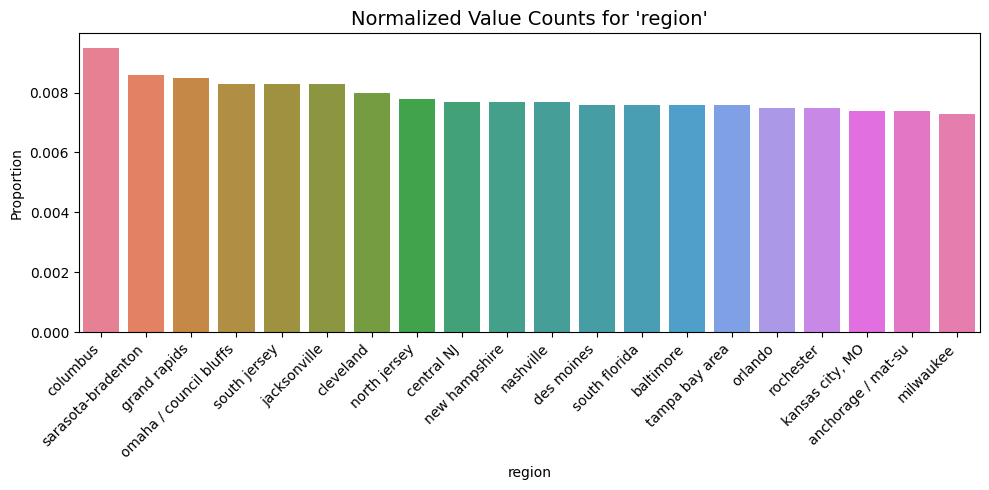


Unique values in 'manufacturer':
['gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'cadillac'
 'honda' 'lexus' 'chrysler' 'volvo' 'audi' 'infiniti' 'lincoln'
 'alfa-romeo' 'subaru' 'acura' 'hyundai' 'jaguar' 'bmw' 'mitsubishi'
 'mazda' 'porsche' 'buick' 'kia' 'dodge' 'mercedes-benz' 'rover' 'mini'
 'volkswagen' 'tesla' 'saturn' 'pontiac' 'mercury' 'fiat'
 'harley-davidson' 'land rover']
manufacturer
land rover        0.00
harley-davidson   0.00
fiat              0.00
porsche           0.00
mercury           0.00
saturn            0.00
tesla             0.00
alfa-romeo        0.00
jaguar            0.00
pontiac           0.00
rover             0.00
mini              0.01
volvo             0.01
mitsubishi        0.01
lincoln           0.01
mazda             0.01
infiniti          0.01
buick             0.01
acura             0.02
cadillac          0.02
chrysler          0.02
audi              0.02
lexus             0.02
volkswagen        0.02
kia               0.02
mercedes-benz 

/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


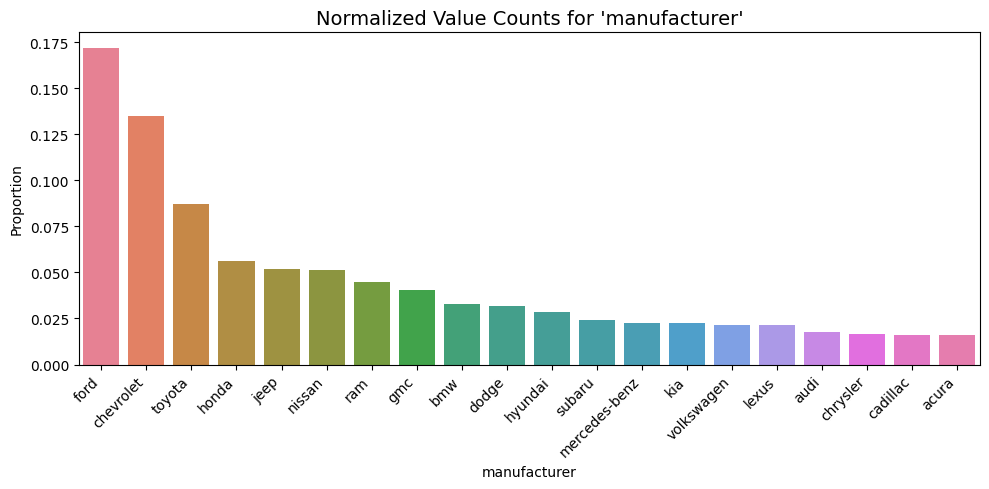


Unique values in 'condition':
['good' 'excellent' 'fair' 'like new' 'new' 'salvage']
condition
salvage     0.00
new         0.00
fair        0.01
like new    0.05
excellent   0.24
good        0.70
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


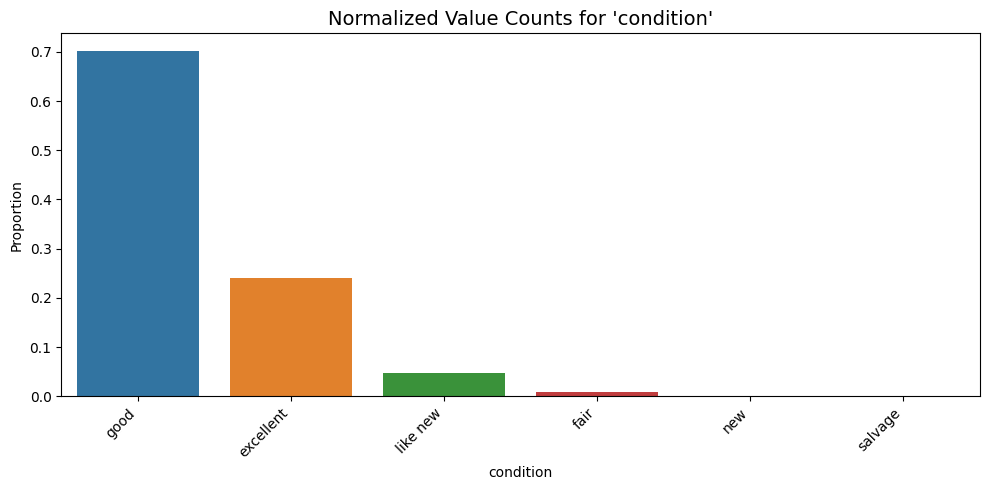


Unique values in 'cylinders':
['8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' '10 cylinders'
 'other' '3 cylinders' '12 cylinders']
cylinders
12 cylinders   0.00
3 cylinders    0.00
other          0.00
10 cylinders   0.00
5 cylinders    0.00
8 cylinders    0.15
4 cylinders    0.20
6 cylinders    0.65
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


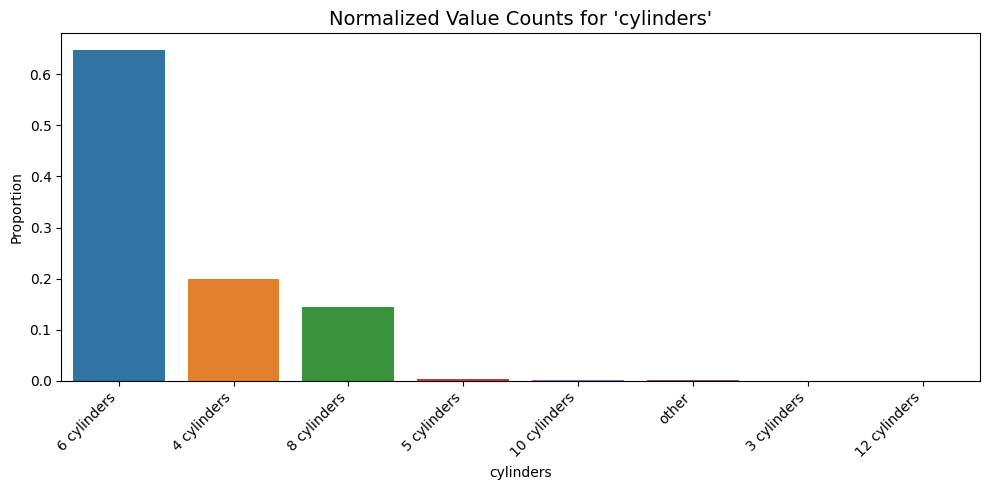


Unique values in 'fuel':
['gas' 'other' 'diesel' 'hybrid' 'electric']
fuel
electric   0.00
hybrid     0.01
diesel     0.05
other      0.07
gas        0.87
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


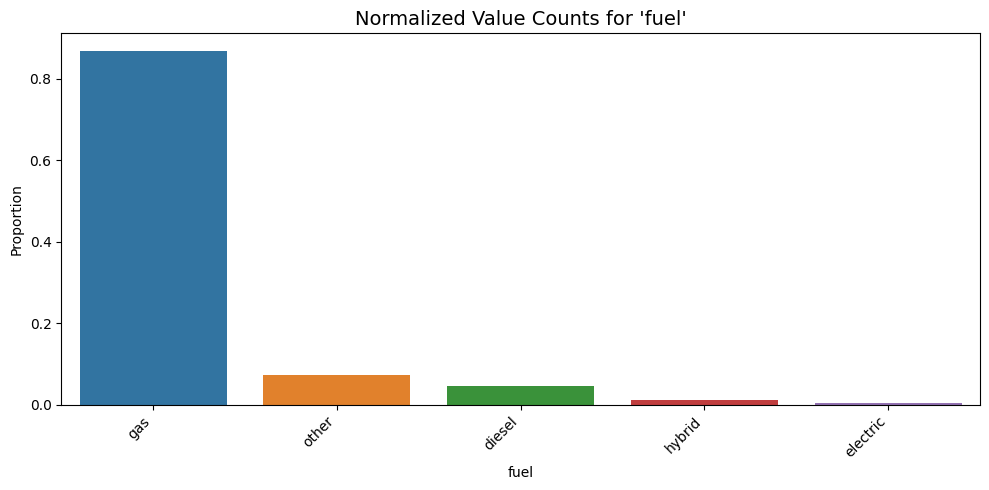


Unique values in 'title_status':
['clean' 'lien' 'rebuilt' 'salvage' 'missing' 'parts only']
title_status
parts only   0.00
missing      0.00
lien         0.00
salvage      0.01
rebuilt      0.02
clean        0.97
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


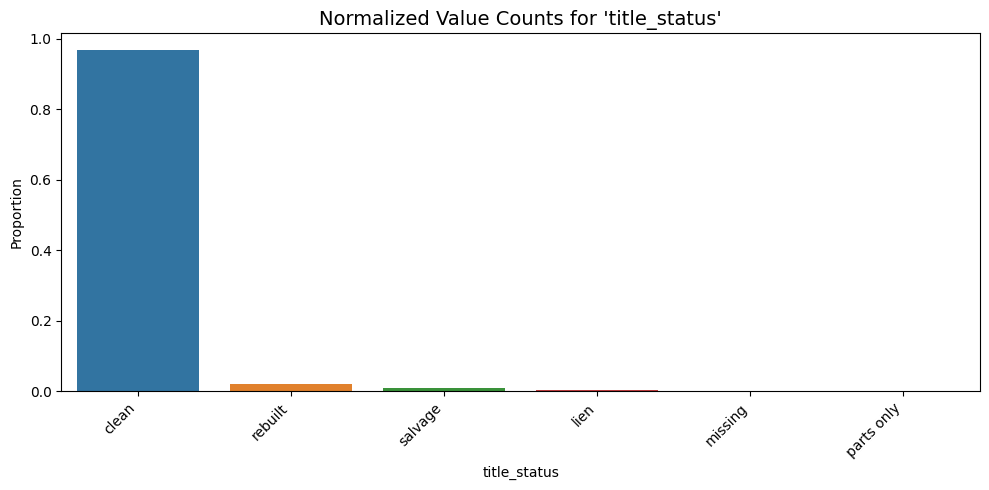


Unique values in 'transmission':
['other' 'automatic' 'manual']
transmission
manual      0.04
other       0.16
automatic   0.80
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


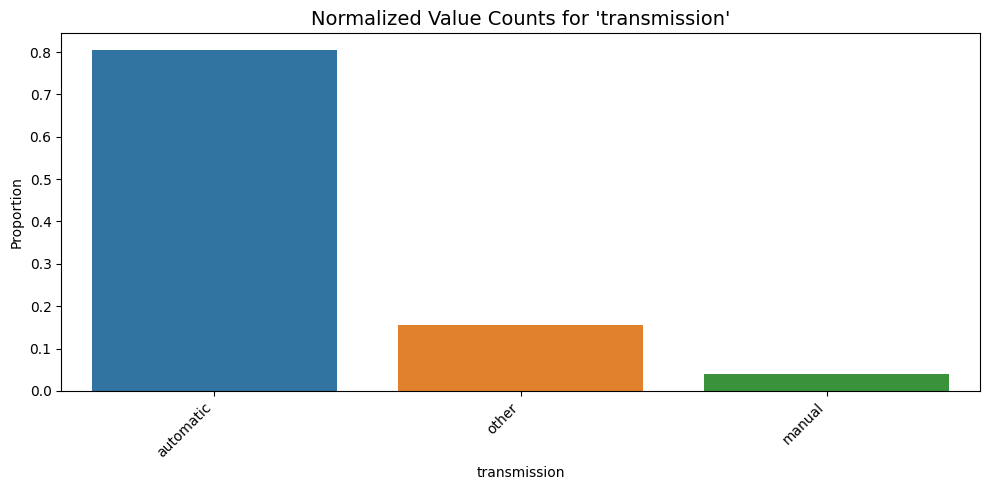


Unique values in 'drive':
['4wd' 'rwd' 'fwd']
drive
rwd   0.11
fwd   0.27
4wd   0.61
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


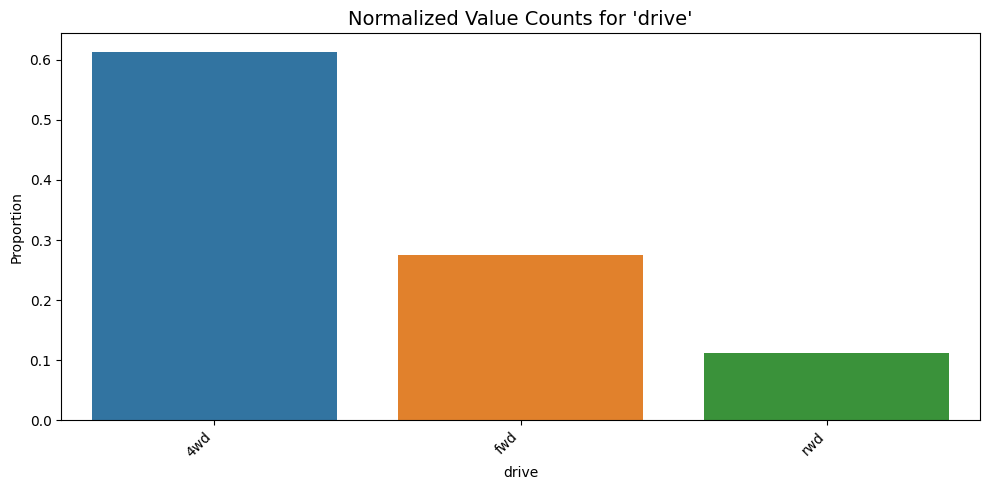


Unique values in 'type':
['pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'convertible' 'wagon' 'van' 'bus']
type
bus           0.00
offroad       0.00
convertible   0.01
mini-van      0.01
van           0.02
wagon         0.03
hatchback     0.04
coupe         0.04
other         0.05
truck         0.07
pickup        0.12
SUV           0.20
sedan         0.43
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


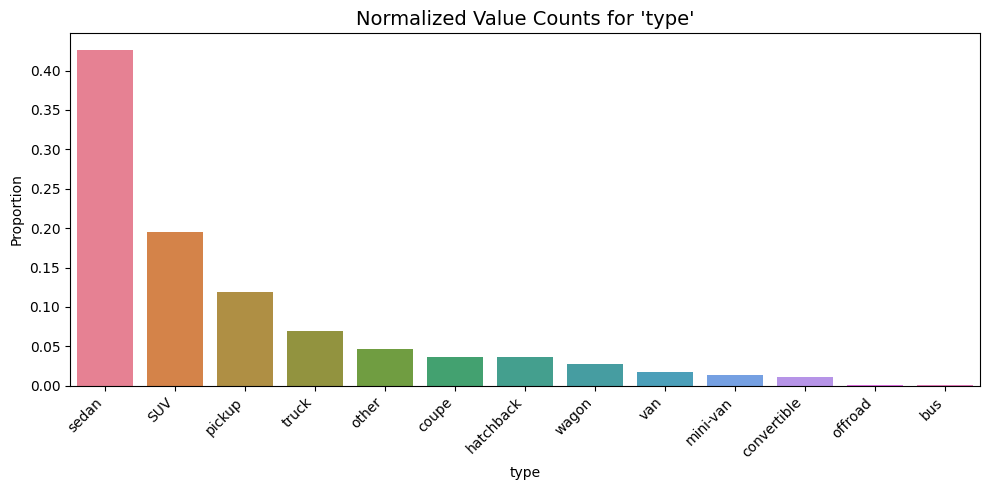


Unique values in 'paint_color':
['white' 'blue' 'red' 'black' 'silver' 'grey' 'unknown' 'brown' 'orange'
 'yellow' 'custom' 'green' 'purple']
paint_color
purple    0.00
yellow    0.00
orange    0.00
green     0.01
brown     0.02
custom    0.02
grey      0.06
red       0.07
blue      0.08
silver    0.11
black     0.16
white     0.18
unknown   0.28
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


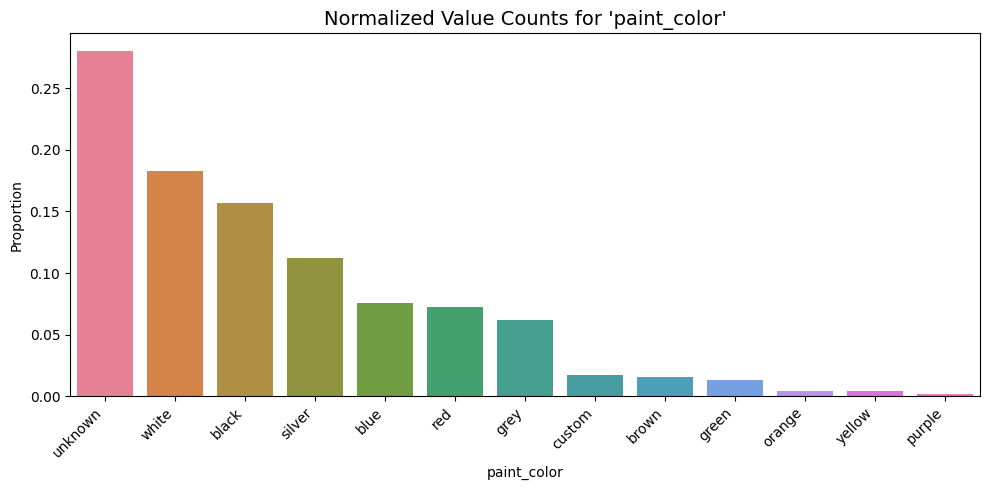


Unique values in 'state':
['al' 'ak' 'az' 'ar' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'id' 'il'
 'in' 'ia' 'ks' 'ky' 'la' 'me' 'md' 'ma' 'mi' 'mn' 'ms' 'mo' 'mt' 'nc'
 'ne' 'nv' 'nj' 'nm' 'ny' 'nh' 'nd' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'vt' 'va' 'wa' 'wv' 'wi' 'wy']
state
nd   0.00
wy   0.00
de   0.00
ut   0.00
ne   0.00
wv   0.00
ms   0.00
sd   0.00
ri   0.01
hi   0.01
vt   0.01
dc   0.01
me   0.01
nv   0.01
la   0.01
nh   0.01
nm   0.01
ar   0.01
ak   0.01
mo   0.01
md   0.01
ky   0.01
al   0.01
ct   0.01
sc   0.01
mt   0.01
ok   0.01
in   0.02
ks   0.02
ga   0.02
az   0.02
mn   0.02
id   0.02
ma   0.02
ia   0.02
co   0.02
il   0.02
wa   0.03
va   0.03
nj   0.03
wi   0.03
tn   0.03
or   0.03
nc   0.03
pa   0.03
mi   0.04
oh   0.05
ny   0.05
tx   0.06
fl   0.07
ca   0.10
Name: proportion, dtype: float64


/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


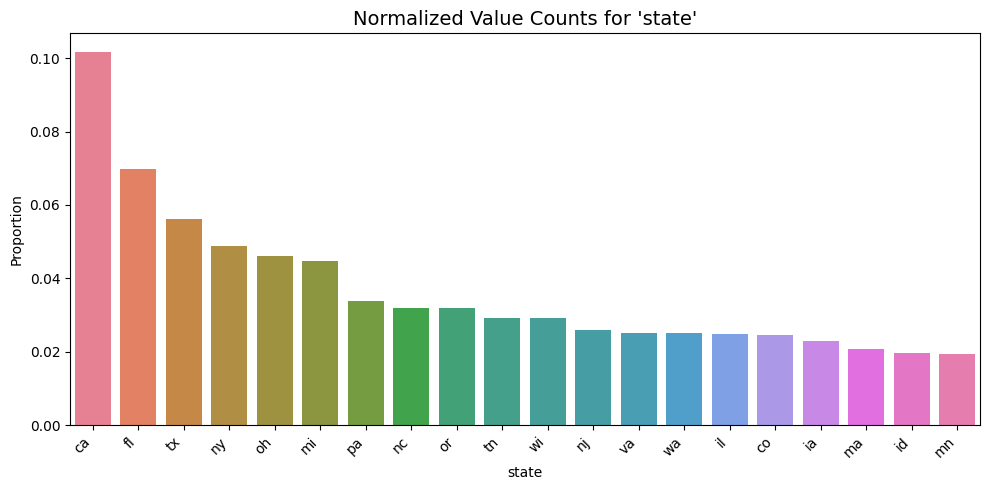


Unique values in 'model':
['sierra' 'silverado' 'tundra' 'f-150' 'tacoma' 'colorado' 'corvette'
 'wrangler' 'camaro' 'frontier' 'f150' 'regular' 'ranger' 'xt4' 'f250'
 'renegade' 'odyssey' 'quad' 'classic' 'mustang' 'f450' 'civic'
 'expedition' 'nx' 'town' 's60' 'q5' 'qx60' 'continental' 'romeo'
 'impreza' 'mdx' 'a6' 'sonata' 'crew' 'acadia' 'mkz' 'e-pace' 'fj' 'camry'
 '128i' 'limited' 'outlander' 'sentra' 'forester' 'tlx' 'z4' 'crv' 'mx-5'
 'boxster' 'miata' 'rx350' 'gx470' 'thunderbird' 'titan' 'focus' 'altima'
 'enclave' 'ridgeline' '5' 'optima' 'lacrosse' 'elantra' 'blazer' 'versa'
 'yukon' 'c-max' 'f750' 'escape' 'grand' 'corolla' 'soul' 'sorento'
 'pathfinder' 'taurus' 'x3' 'accord' 'sts' 'tl' 'murano' 'avalon' 'edge'
 '1500' 'captiva' 'forte' 'cobalt' 'm-class' 'rogue' 'legacy' '2500'
 'terrain' 'cls' 'sport' 'cavalier' '3500' 'sportage' 'accent' '300'
 'cooper' '4runner' 'q7' 'trax' 'hhr' 'eclipse' 'prius' '370z' 'x6'
 'venza' 'challenger' 'f-250' 'explorer' 'jetta' 'xv' 'reg

/tmp/ipython-input-6-1696121922.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Force remove the legend noticed sometimes even with legend=False shows legend


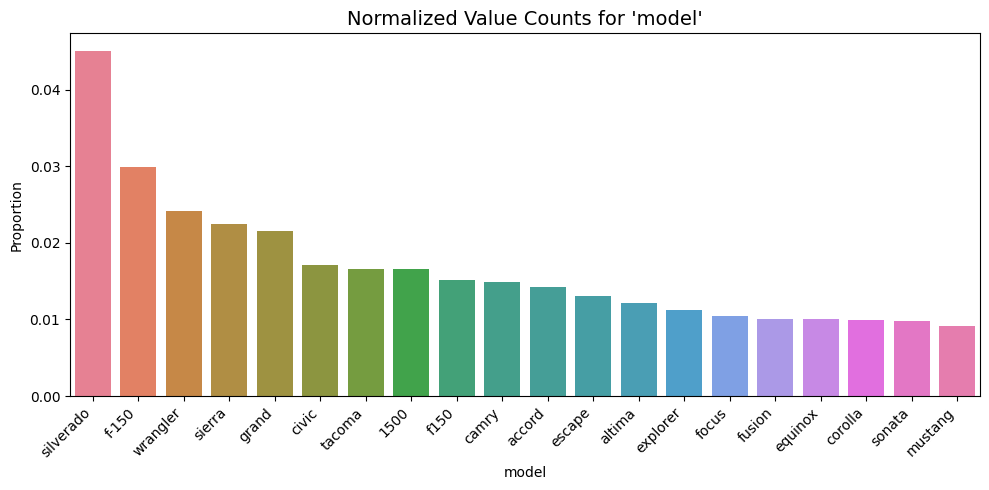

In [32]:
#Categorical Features

for col in df.select_dtypes(include=['object']):
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())
    df_view = df[col].value_counts(dropna=False,normalize=True).round(4).sort_values()
    print(df_view)
    plot_normalized_bar(df, col=col, top_n=20)

In [33]:
#Missing Values
missing = df.isna().sum()[df.isna().sum() > 0]
print(missing.count())
#Zeros or negatives in numeric columns:
print(df[df['price'] <= 0].shape[0])  # Check invalid prices
print(df[df['odometer'] <= 0].shape[0]) # Check invalid prices


0
0
0


### **EDA - Bivariate and Multivariate Analysis**

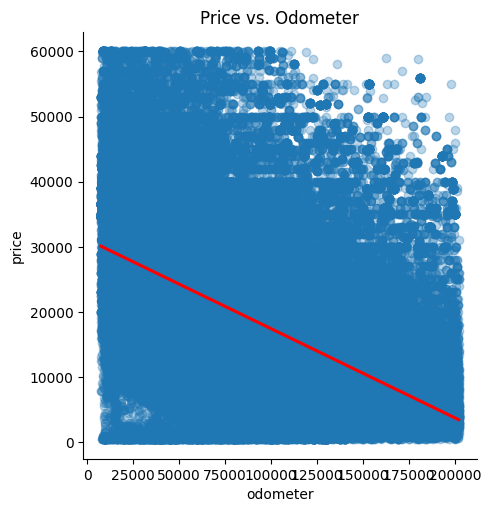

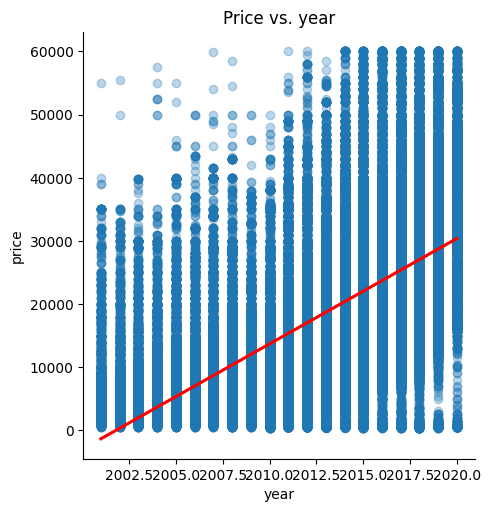

In [34]:
# Scatter plot with regression line
sns.lmplot(data=df, x='odometer', y='price', line_kws={'color': 'red'}, scatter_kws={'alpha':0.3})
plt.title('Price vs. Odometer')
plt.show()

sns.lmplot(data=df, x='year', y='price', line_kws={'color': 'red'}, scatter_kws={'alpha':0.3})
plt.title('Price vs. year')
plt.show()

# as we suspected the Price and Odometer has clearly slopes downward, confirming the inverse relationship
# as we suspected the Price and year has clearly slopes upward or age downward, confirming the inverse relationship with age of car

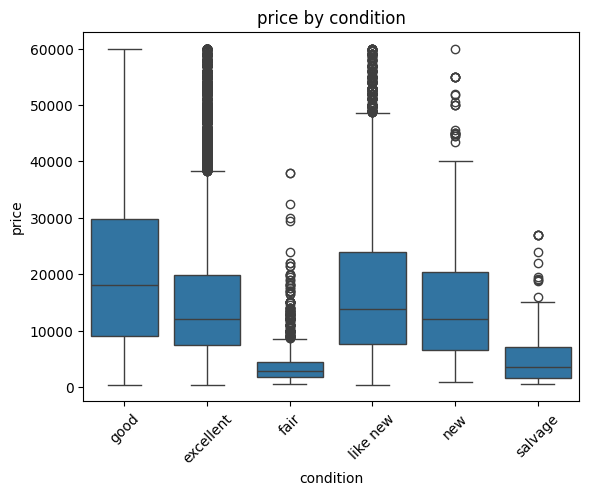

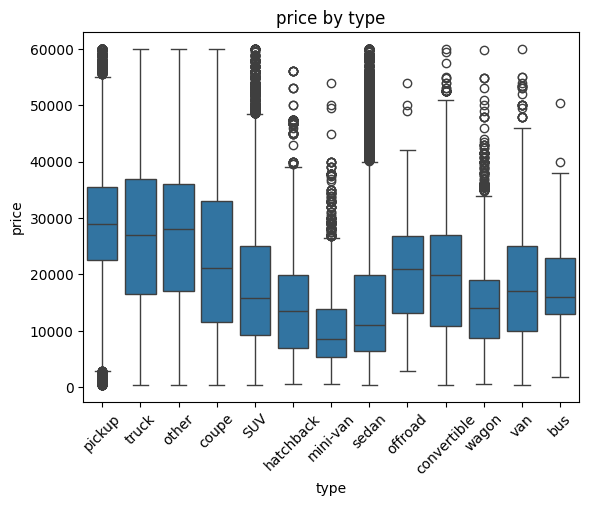

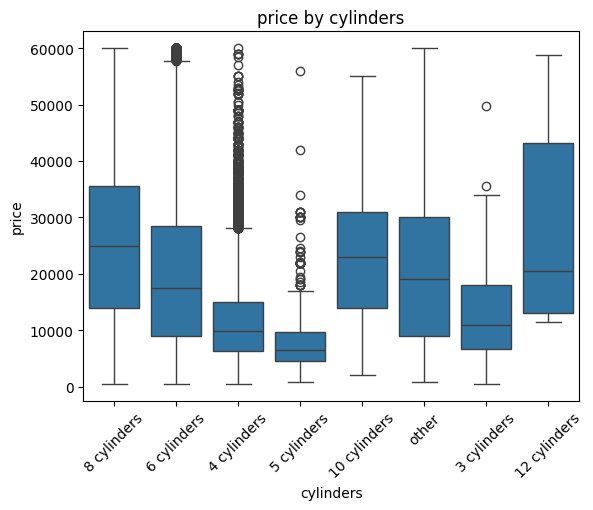

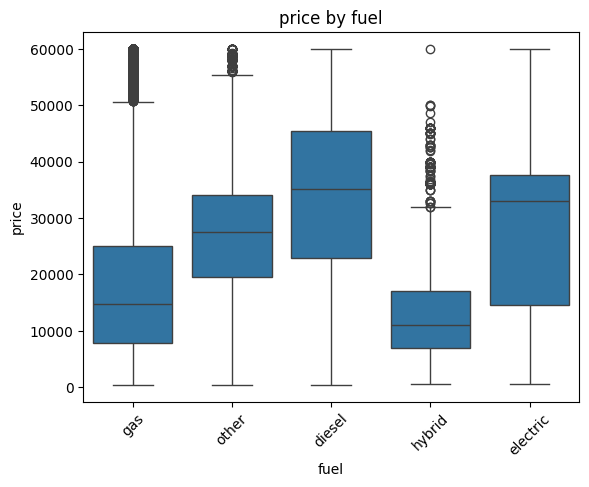

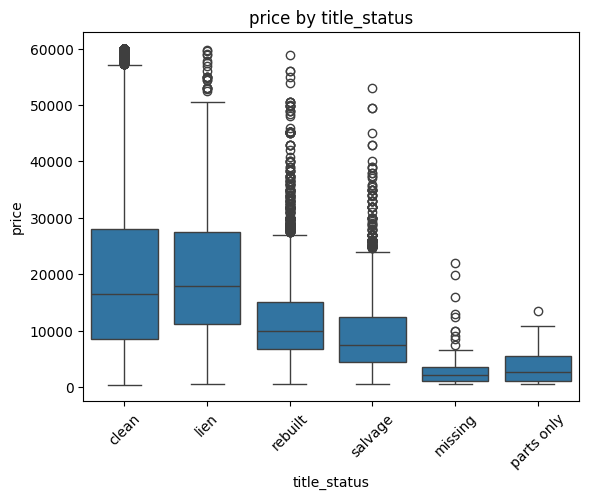

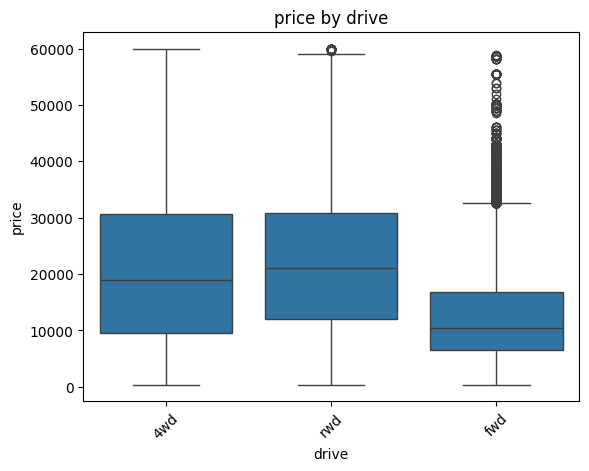

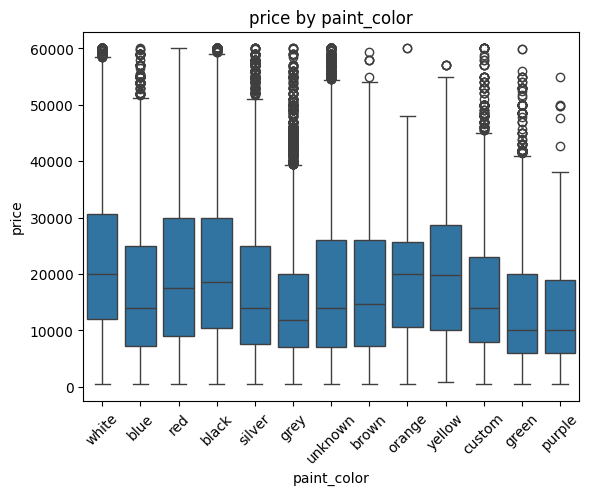

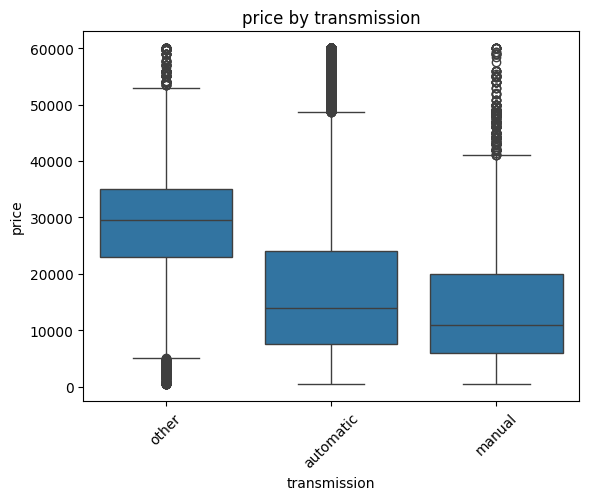

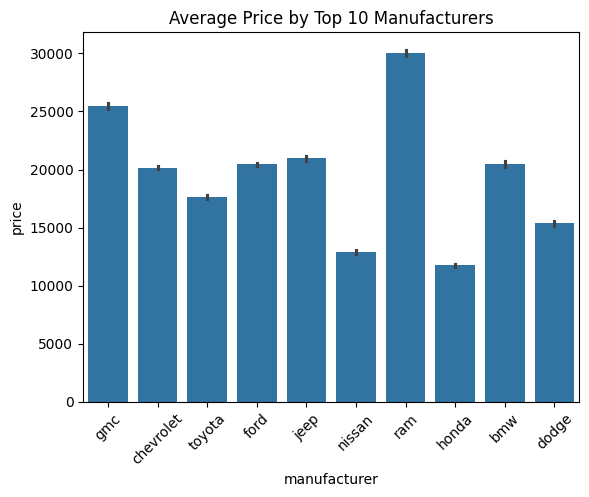

In [35]:
# Boxplot of price across condition
for col in ['condition', 'type','cylinders','fuel','title_status','drive','paint_color','transmission']:
  sns.boxplot(data=df, x=df[col], y=df['price'])
  plt.xticks(rotation=45)
  plt.title(f'price by {col}')
  plt.show()

# Barplot of average price per manufacturer (top 10)
top_makes = df['manufacturer'].value_counts().head(10).index
sns.barplot(data=df[df['manufacturer'].isin(top_makes)], x='manufacturer', y='price')
plt.xticks(rotation=45)
plt.title('Average Price by Top 10 Manufacturers')
plt.show()

In [36]:
df['transmission'].value_counts()
# Use IQR method or z-score to identify extreme low outliers
Q1 = df[df['transmission'] == 'other']['price'].quantile(0.25)
Q3 = df[df['transmission'] == 'other']['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
# we have some outlier in othere and less than q1 we can remove them
df = df[~((df['transmission'] == 'other') &
          ((df['price'] < lower_bound)))]

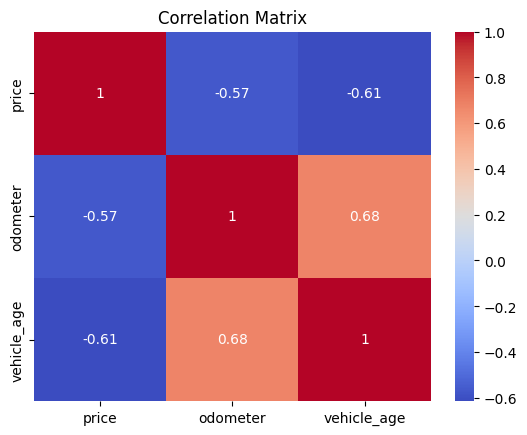

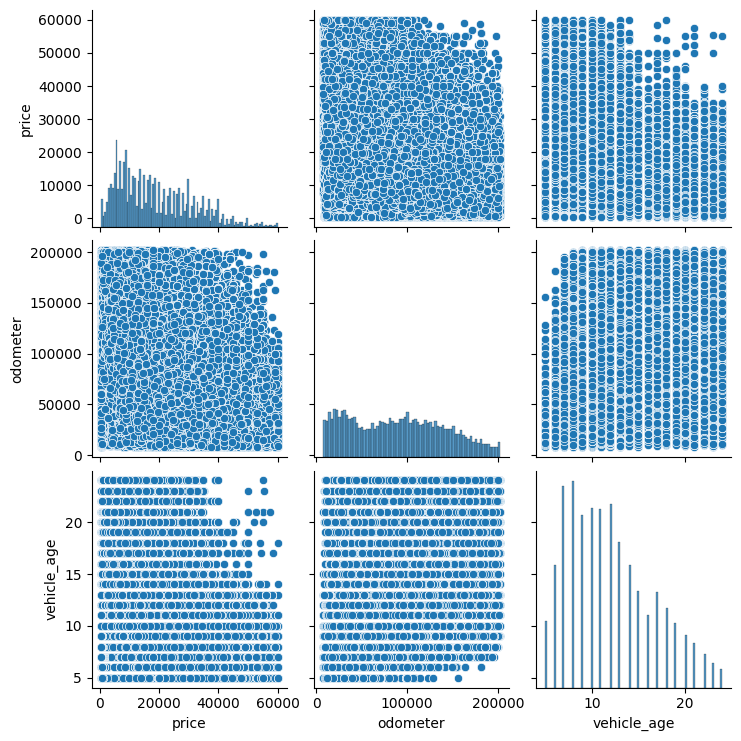

In [37]:
#Multivariate Analysis
#Add Vehicle Age and remove year
from datetime import datetime
current_year = datetime.now().year
df['vehicle_age'] = current_year - df['year']


numeric_cols = ['price', 'odometer', 'vehicle_age']  # add more if needed
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(df[['price', 'odometer', 'vehicle_age']])

### **Feature Engineering Ideas**

In [38]:
# we replace vehicle_age with Year and Odometer
# Price to log price
df['price'] = np.log(df['price'])
df['odometer'] = np.log(df['odometer'])

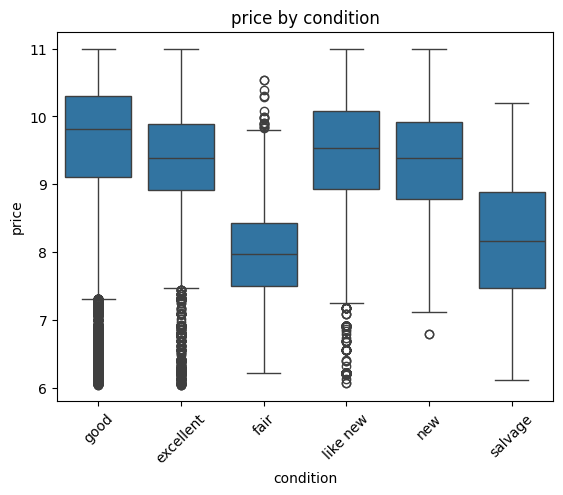

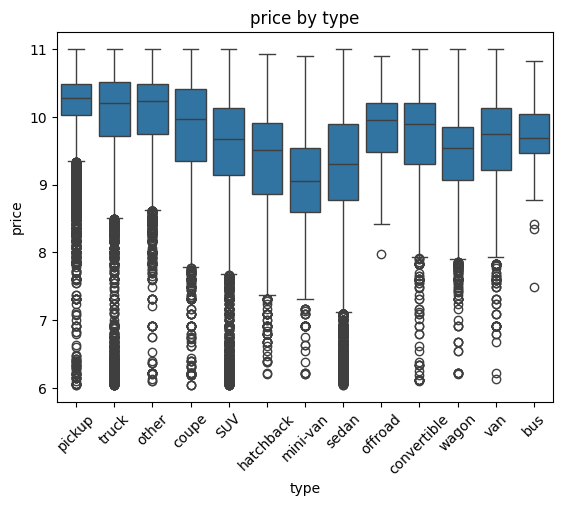

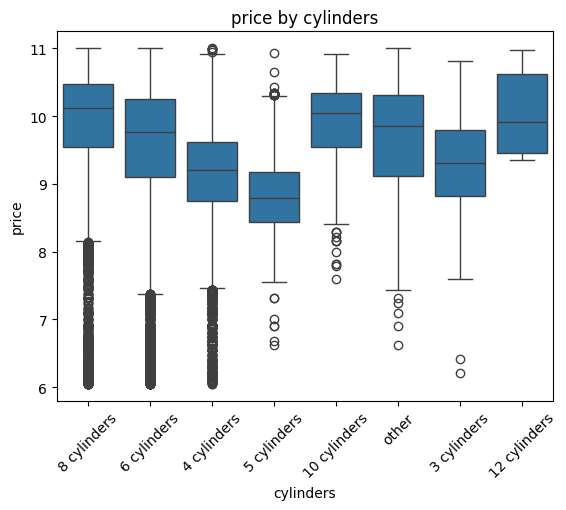

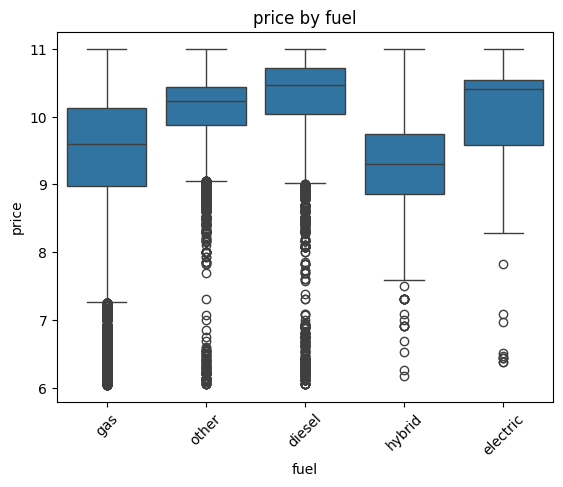

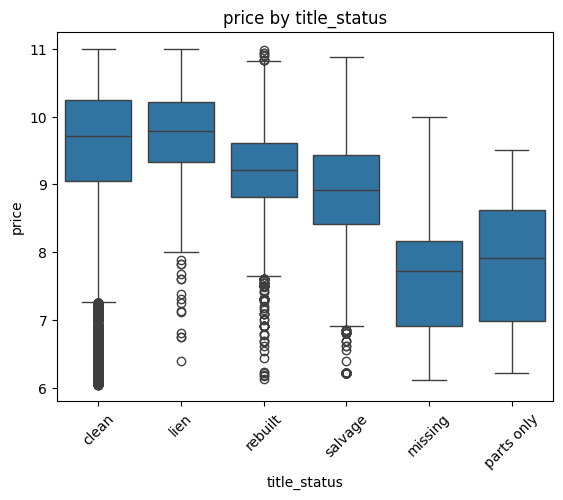

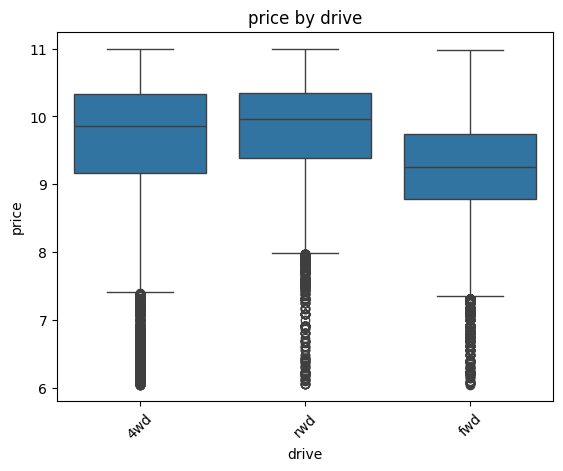

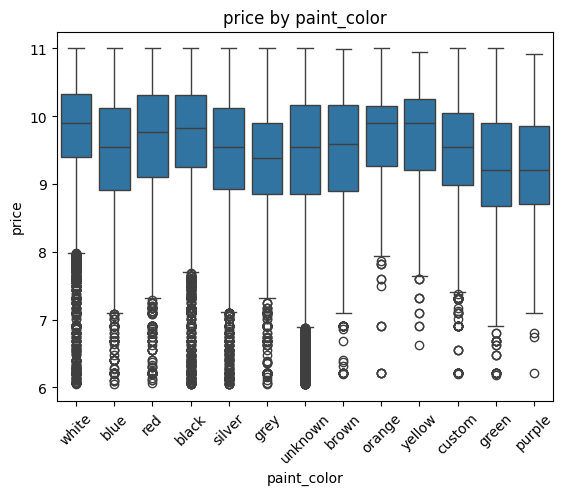

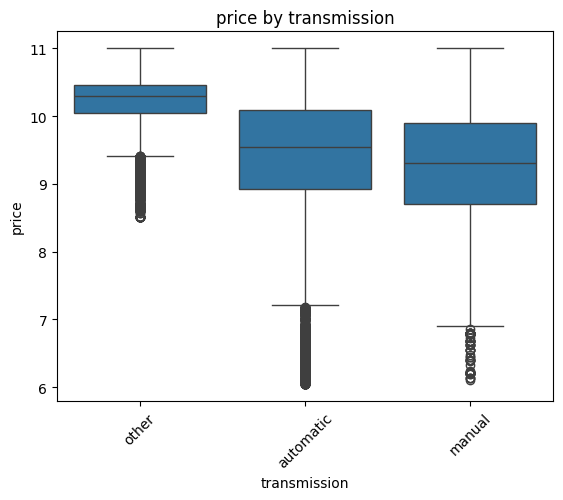

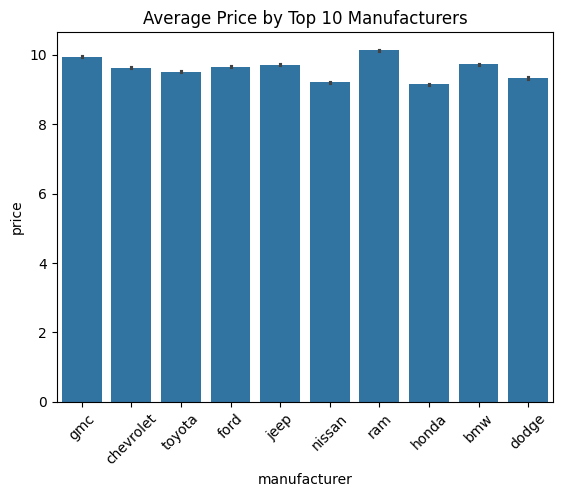

In [39]:
# Boxplot of price across condition
for col in ['condition', 'type','cylinders','fuel','title_status','drive','paint_color','transmission']:
  sns.boxplot(data=df, x=df[col], y=df['price'])
  plt.xticks(rotation=45)
  plt.title(f'price by {col}')
  plt.show()

# Barplot of average price per manufacturer (top 10)
top_makes = df['manufacturer'].value_counts().head(10).index
sns.barplot(data=df[df['manufacturer'].isin(top_makes)], x='manufacturer', y='price')
plt.xticks(rotation=45)
plt.title('Average Price by Top 10 Manufacturers')
plt.show()

In [40]:
def remove_outliers_by_group(df, group_col, value_col):
    cleaned_df = pd.DataFrame()
    for condition in df[group_col].unique():
        subset = df[df[group_col] == condition]
        Q1 = subset[value_col].quantile(0.25)
        Q3 = subset[value_col].quantile(0.85)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        filtered = subset[(subset[value_col] >= lower) & (subset[value_col] <= upper)]
        cleaned_df = pd.concat([cleaned_df, filtered])
    return cleaned_df

# removing outliers in each column
for col in ['condition', 'type','cylinders','fuel','title_status','drive','paint_color','transmission']:
  df = remove_outliers_by_group(df, group_col=col, value_col='price')
#Add Vehicle Age and remove year
df = df.drop(columns=['year','id'])

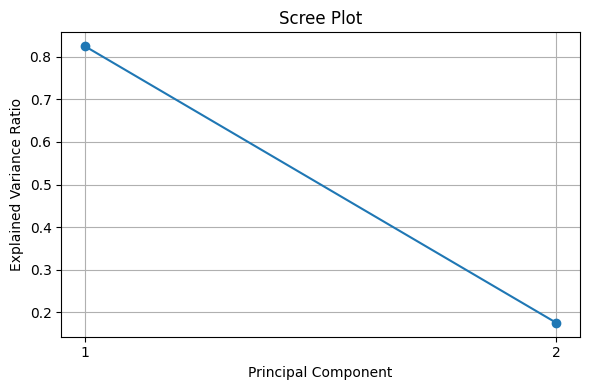

In [41]:
#Apply PCA to vehicle_age & odometer to see if they are highly cor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select features with multicollinearity
X = df[['vehicle_age', 'odometer']]

# Standardize (before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(6, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# based on the scree plot decided to include both columns and not dropping columns

[link text](https://)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [42]:
df.head()

,region,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,model,vehicle_age
27,auburn,10.42,gmc,good,8 cylinders,gas,10.97,clean,other,4wd,pickup,white,al,sierra,11.00
51,auburn,10.03,ram,good,8 cylinders,gas,10.58,clean,other,4wd,pickup,white,al,regular,8.00
62,auburn,10.17,ram,good,8 cylinders,gas,9.42,clean,other,4wd,pickup,white,al,classic,6.00
221,birmingham,10.42,gmc,good,8 cylinders,gas,10.97,clean,other,4wd,pickup,white,al,sierra,11.00
572,birmingham,10.17,ram,good,8 cylinders,gas,9.42,clean,other,4wd,pickup,white,al,classic,6.00


In [43]:
# as manufacturer an model can be complex I choose top 10 manufacturer and decide use type not model
# Define Model based on State California

In [44]:
from typing_extensions import OrderedDict
numeric_features = ['vehicle_age', 'odometer']
categorical_features = [
    'manufacturer', 'cylinders', 'fuel',
     'transmission', 'drive', 'type'
]


ordinal_categories = [
   ['salvage', 'fair', 'good', 'excellent', 'like new', 'new'],  # for 'condition'
   ['parts only', 'missing','lien','salvage','rebuilt','clean']   # for 'title'
]


ordinal_features = ['condition','title_status']
target = 'price'

In [45]:
top_10 = df['manufacturer'].value_counts(dropna=False, normalize=True).round(4).sort_values(ascending=False).head(20)
df_top_10_ca = df[df['manufacturer'].isin(top_10.index) & (df['state'] == 'ca')]
df_top_10_ca

,region,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,model,vehicle_age
21368,bakersfield,10.42,gmc,good,8 cylinders,gas,10.97,clean,other,4wd,pickup,white,ca,sierra,11.00
21424,bakersfield,10.51,chevrolet,good,8 cylinders,gas,8.94,clean,other,4wd,pickup,white,ca,silverado,6.00
21877,bakersfield,10.17,ram,good,8 cylinders,gas,9.42,clean,other,4wd,pickup,white,ca,classic,6.00
23816,chico,10.17,toyota,good,8 cylinders,gas,11.50,clean,other,4wd,pickup,white,ca,tundra,12.00
24063,chico,10.03,ram,good,8 cylinders,gas,10.58,clean,other,4wd,pickup,white,ca,regular,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66406,stockton,9.68,jeep,excellent,6 cylinders,gas,11.58,clean,manual,4wd,SUV,yellow,ca,wrangler,24.00
26465,fresno / madera,10.47,chevrolet,like new,8 cylinders,gas,10.75,clean,manual,rwd,coupe,yellow,ca,corvette,14.00
34434,los angeles,9.17,ford,excellent,8 cylinders,gas,12.07,clean,manual,rwd,convertible,yellow,ca,mustang,19.00
35350,los angeles,9.17,ford,excellent,8 cylinders,gas,12.07,clean,manual,rwd,convertible,yellow,ca,mustang,19.00


In [46]:

# Separate features and target
X = df[numeric_features + categorical_features+ordinal_features]
y = df[target]

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

transformer = make_column_transformer((PolynomialFeatures(), make_column_selector(dtype_include=np.number)),
                                       (OneHotEncoder(drop = 'if_binary'), categorical_features),
                                      (OrdinalEncoder(categories=ordinal_categories), ordinal_features),
                                       remainder = StandardScaler())

pipeline = Pipeline([
    ('preprocessor', transformer),
    ('ridge', Ridge())
])

param_grid = {
    'preprocessor__polynomialfeatures__degree': [1, 2, 3],   # Polynomial degrees
    'ridge__alpha': [0.01, 0.1, 1, 10]              # Ridge alpha values
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring='neg_mean_squared_error',
)



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
import traceback

try:
    grid.fit(X_train, y_train)
except Exception as e:
    traceback.print_exc()


In [49]:
print("Best degree:", grid.best_params_['preprocessor__polynomialfeatures__degree'])
print("Best alpha:", grid.best_params_['ridge__alpha'])
print("Test R² Score:", grid.score(X_test, y_test)) # R² < 0 → Model is worse than just predicting the mean R² = 0 → Model predicts no better than the mean R² < 0 → Model is worse than just predicting the mean

Best degree: 2
Best alpha: 1
Test R² Score: -0.12250551141064284


In [50]:
 # Make predictions on training and test data
pred_train_ridge = grid.predict(X_train[numeric_features + categorical_features+ordinal_features])
pred_test_ridge = grid.predict(X_test[numeric_features + categorical_features+ordinal_features])



In [51]:
#Testing Lasso

In [52]:
from sklearn.linear_model import Lasso
pipelineLasso = Pipeline([
    ('preprocessor', transformer),  # your ColumnTransformer
    ('lasso', Lasso())
])

pipelineLasso.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b1e0a622c90>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'cylinders',
                                                   'fuel', 'transmission',
                                                   'drive', 'type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new'],
                                                                             ['parts '
                                                                              'only',
                                                                              'missing',
                                                                              'lien',
                                                                              'salvage',
                                                                              'rebuilt',
                                                                              'clean']]),
                                                  ['condition',
                                                   'title_status'])])),
                ('lasso', Lasso())])

In [53]:
 # Make predictions on training and test data
pred_train_lasso= pipelineLasso.predict(X_train[numeric_features + categorical_features+ordinal_features])
pred_test_lasso = pipelineLasso.predict(X_test[numeric_features + categorical_features+ordinal_features])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [54]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error for training and test sets using ridge
mse_train = mean_squared_error(y_train, pred_train_ridge)
mse_test = mean_squared_error(y_test, pred_test_ridge)

print("Mean Squared Error:", mse_train)
print("Mean Squared Error:", mse_test)

Mean Squared Error: 0.12151510556795588
Mean Squared Error: 0.12250551141064284


In [55]:
# Calculate Mean Squared Error for training and test sets using Lasso
mse_train = mean_squared_error(y_train, pred_train_lasso)
mse_test = mean_squared_error(y_test, pred_test_lasso)

print("Mean Squared Error:", mse_train)
print("Mean Squared Error:", mse_test)

Mean Squared Error: 0.271038829610343
Mean Squared Error: 0.2724106843942754


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Text(0, 0.5, 'Condition')

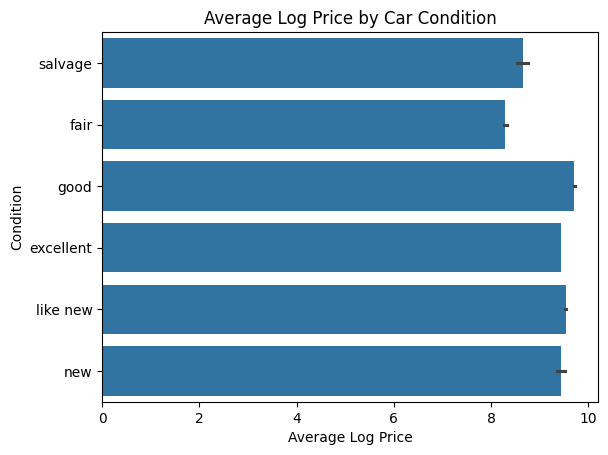

In [57]:
sns.barplot(data=df, x='price', y='condition', estimator=np.mean, order=['salvage', 'fair', 'good', 'excellent', 'like new', 'new'])
plt.title('Average Log Price by Car Condition')
plt.xlabel('Average Log Price')
plt.ylabel('Condition')

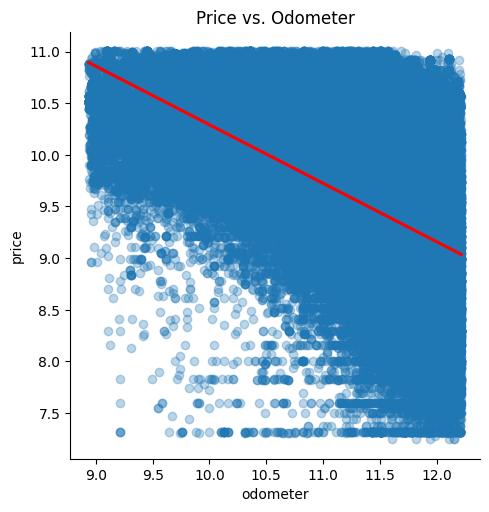

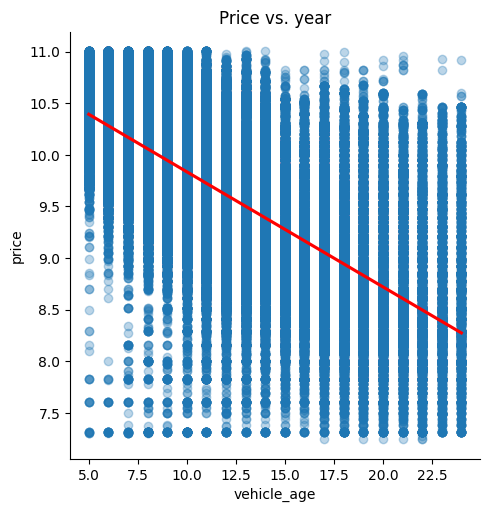

In [61]:
# Scatter plot with regression line
sns.lmplot(data=df, x='odometer', y='price', line_kws={'color': 'red'}, scatter_kws={'alpha':0.3})
plt.title('Price vs. Odometer')
plt.show()

sns.lmplot(data=df, x='vehicle_age', y='price', line_kws={'color': 'red'}, scatter_kws={'alpha':0.3})
plt.title('Price vs. year')
plt.show()


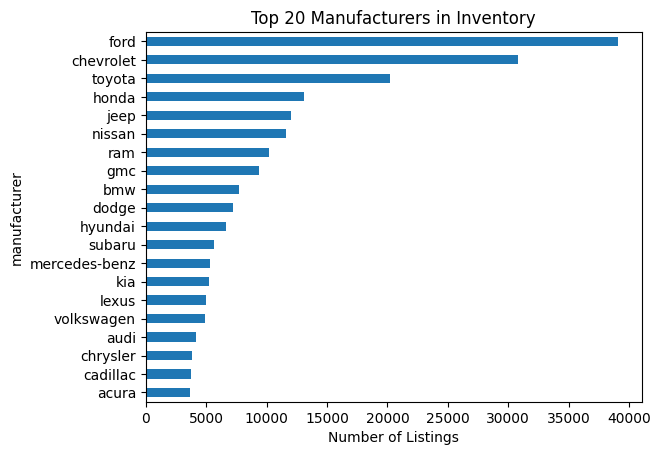

In [62]:
top_20 = df['manufacturer'].value_counts().head(20)
top_20.plot(kind='barh')
plt.title('Top 20 Manufacturers in Inventory')
plt.xlabel('Number of Listings')
plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Price Distribution by Transmission Type')

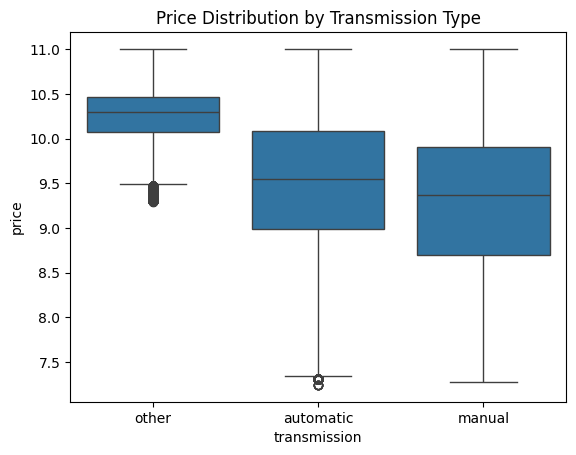

In [64]:
sns.boxplot(data=df, x='transmission', y='price')
plt.title('Price Distribution by Transmission Type')

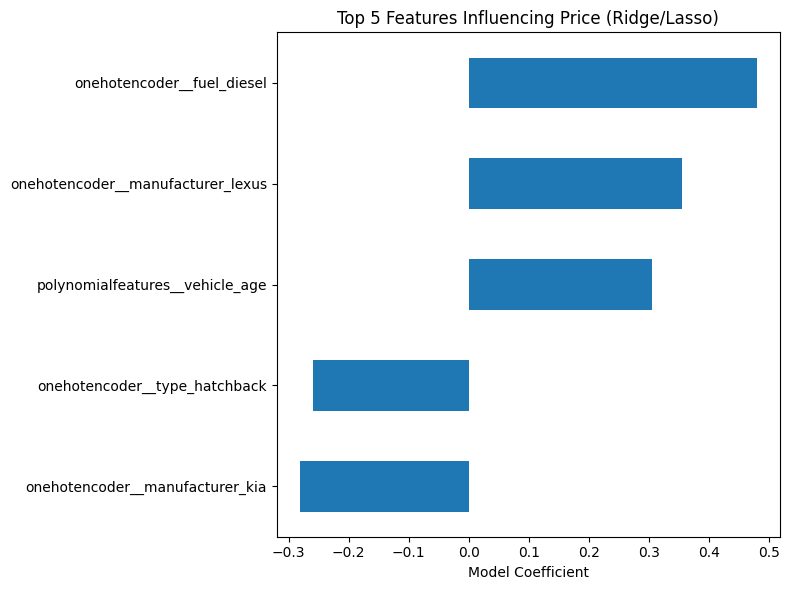

In [71]:
# Get best model from GridSearchCV
best_pipeline = grid.best_estimator_  # grid_search is your GridSearchCV object

# Extract coefficients from the best model
importances = best_pipeline.named_steps['ridge'].coef_

# Extract feature names from the preprocessor
features = best_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Combine into a pandas Series
coef_df = pd.Series(importances, index=features)

# Get top 20 by absolute magnitude (most influential)
top_5 = coef_df.reindex(coef_df.abs().sort_values(ascending=False).index).head(5)

# Plot
top_5.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Top 5 Features Influencing Price (Ridge/Lasso)')
plt.xlabel('Model Coefficient')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Model Predictions vs Actuals')

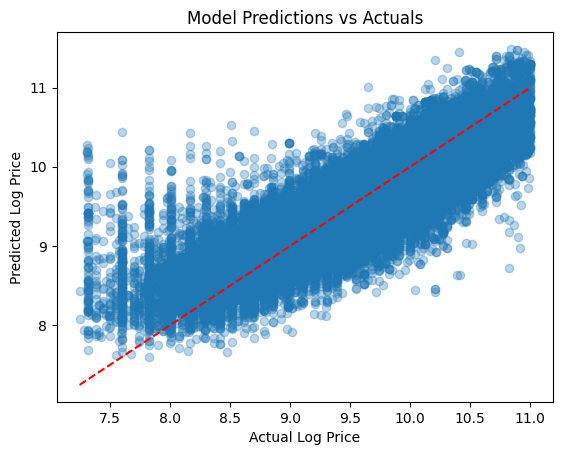

In [70]:
plt.scatter(y_test, pred_test_ridge, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Model Predictions vs Actuals')